# DT on DonorChoose Data set

## 1.0.  Readding Data from Kaggle Cloud

In [1]:
#open('kaggle.json', 'a').close()

In [2]:
#import json
#with open('kaggle.json', 'w', encoding='utf-8') as f:
#    json.dump({"username":"palakurthidurga","key":"85c3c7a8c6843a0c5871d1f93d56b832"}, f, ensure_ascii=False, indent=4)

In [3]:
#file = open('kaggle.json', 'r')
#print(file.read())
#file.close()

In [4]:
#!pip install kaggle
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/

In [5]:
#!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#!pip install -q kaggle-cli

In [7]:
#!~/.local/bin/kaggle datasets download -d palakurthidurga/glovedataset

In [8]:
#!~/.local/bin/kaggle datasets download -d palakurthidurga/donor-choose

In [9]:
#!unzip donor-choose
#!unzip glovedataset


In [10]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

# DonorsChoose
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.

Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:

* How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible
* How to increase the consistency of project vetting across different volunteers to improve the experience for teachers
* How to focus volunteer time on the applications that need the most assistance.

The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# 2.0. Reading Data

## 2.1.Removing warnings 

In [11]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 2.2. Reading Existing Folders

In [12]:
import os
os.listdir()

['donor-choose.zip',
 'glove_vectors',
 '.jupyter',
 'DTDNC-Copy1.ipynb',
 '.ipynb_checkpoints',
 'nltk_data',
 '.bash_history',
 '.ipython',
 '.profile',
 '.bash_logout',
 '.cache',
 'tutorials',
 '.bashrc',
 'kaggle.json',
 '.local',
 'DTDNC.ipynb',
 'resources.csv',
 'glove.42B.300d.txt',
 '.config',
 '.kaggle',
 'glovedataset.zip',
 'train_data.csv']

In [13]:
import numpy as np
import pandas as pd

## 2.3.Reading Existing Data

In [14]:
!chmod 644 train_data.csv
!chmod 644 resources.csv

In [15]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [16]:
print("Number of data points in train data", project_data.shape)
print('*'*50)
print('Number of resource points related to train data', resource_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
**************************************************
Number of resource points related to train data (1541272, 4)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


> **Number of resourse points are higher which means either each project has multiple data points in resource file or some of the project points are missing.**

## 2.4. Replace Project Date column name

In [17]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
# get all column names as list and replace project_submitted_datetime with Date
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
# this will reorder the column name based on the our requirement
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


# 3.0. Preprocessing Data

## 3.1. Preprocessing of porject_subject_category

> Each category contains multiple labels of strings like Math&Science literature.The ampersand tells two words form single word and we need to preserve that, by making Math_Science as one word and literature as one word. We also need to remove words like The, which does not really tell anything to us.

In [18]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

# sort dictionary values https://stackoverflow.com/a/613218
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 3.2.Preprocessing of project_subject_subcategories
> Each category contains multiple labels of strings like Math&Science literature.The ampersand tells two words form single word and we need to preserve that, by making Math_Science as one word and literature as one word. We also need to remove words like The, which does not really tell anything to us.

> We will take each unique string and number of times it is repeating into a dictinary and later point used to generate onehotencoded/Binary BOW vectors

In [19]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 3.3.Preprocessing teacher-prefix data

In [20]:
#remove rows with nan values 
#https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
import re
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('nan')
my_counter = Counter()
prefixes = []
for word in project_data['teacher_prefix'].values:
    word = re.sub('[^A-Za-z0-9]+', '', word)
    prefixes.append(word)
    my_counter.update(word.split())
teacher_prefix_dict = dict(my_counter)
teacher_prefix_cat_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))
print(teacher_prefix_cat_dict)
teacher_prefix_cat_dict.pop('nan', None)
project_data['teacher_prefix'] = prefixes
print(project_data['teacher_prefix'].values)

{'Dr': 13, 'nan': 3, 'Mr': 10648, 'Mrs': 57269, 'Teacher': 2360, 'Ms': 38955}
['Mrs' 'Ms' 'Mrs' ... 'Mrs' 'Mrs' 'Mrs']


## 3.4.Preprocessing School state data

In [21]:
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
school_state_dict = dict(my_counter)
school_state_cat_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))
print(school_state_cat_dict)

{'CA': 15388, 'HI': 507, 'LA': 2394, 'AR': 1049, 'WY': 98, 'ID': 693, 'CO': 1111, 'WI': 1827, 'MS': 1323, 'KS': 634, 'IN': 2620, 'SC': 3936, 'AK': 345, 'NH': 348, 'SD': 300, 'NV': 1367, 'OH': 2467, 'AL': 1762, 'IA': 666, 'AZ': 2147, 'MI': 3161, 'WA': 2334, 'OK': 2276, 'RI': 285, 'WV': 503, 'VA': 2045, 'MO': 2576, 'NC': 5091, 'TN': 1688, 'NY': 7318, 'MA': 2389, 'OR': 1242, 'NE': 309, 'UT': 1731, 'MT': 245, 'GA': 3963, 'KY': 1304, 'NJ': 2237, 'ME': 505, 'CT': 1663, 'NM': 557, 'DE': 343, 'MD': 1514, 'MN': 1208, 'IL': 4350, 'PA': 3109, 'ND': 143, 'FL': 6185, 'VT': 80, 'DC': 516, 'TX': 7396}


## 3.5.Preprocessing of Project Grade Cateory Data

In [22]:
my_counter = Counter()

#we will replace given categorical values with our own so that it is easy to preprocess
"""
h: for grades 9-12
lh: Grades 6-8
up: for Grades 3-5
p: Grades Prek-2
"""

project_data['project_grade_category'].replace(
    to_replace=['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2'],
    value=['h', 'lh', 'up', 'p'],
    inplace=True
)
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
project_grade_category_dict = dict(my_counter)
project_grade_category_cat_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))
project_grade_category_cat_dict.pop('Grades', None)
print(project_grade_category_cat_dict)

{'lh': 16923, 'up': 37137, 'p': 44225, 'h': 10963}


## 3.6. Preprocessing of essays

### 3.6.1.Merging all essays

> As mention in the documentation of problem statement, before 2016 there submitter must have write 4 essays but now they only need to write 2. Either way the essays describe how the project is going to help students.

In [23]:
# merge two column text dataframe: 
#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

### 3.6.2.Drop `project_essay_1` `project_essay_2` `project_essay_3` `project_essay_4`

In [24]:
#  delete #project_essay_1,2,3,4
project_data.drop(["project_essay_1", "project_essay_2",  "project_essay_3", "project_essay_4"], inplace= True, axis = 1) 
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,p,Engineering STEAM into the Primary Classroom,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,up,Sensory Tools for Focus,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


### 3.6.3.Read some random essay

In [25]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

> Essays have characters like \r\n\t etc which are useless for our analyssis. . Along with special characters it also contains some special charecters

### 3.6.4.Extend short forms

In [26]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase) #kiran's = kiran has; it's  = it is
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [27]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

### 3.6.5. Remove Special Characters

In [28]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [29]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [30]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", 'nannan', 'not']

In [31]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Combining all the above stepls 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    sent = " ".join([wnl.lemmatize(i) for i in sent.split()])
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [02:28<00:00, 738.16it/s]


In [33]:
# after preprocesing
preprocessed_essays[20000]
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(["essay"], inplace= True, axis = 1) 
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essays
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,p,Engineering STEAM into the Primary Classroom,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,fortunate enough use fairy tale stem kit class...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,up,Sensory Tools for Focus,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,imagine 8 9 year old third grade classroom see...


## 3.7.Preprocessing of titles

In [34]:
# printing some random reviews
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[5000])
print("="*50)
print(project_data['project_title'].values[10000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[30000])
print("="*50)
print(project_data['project_title'].values[40000])
print("="*50)
print(project_data['project_title'].values[50000])
print("="*50)
print(project_data['project_title'].values[70000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Engineering STEAM into the Primary Classroom
Building Blocks for Learning
Empowering Students Through Art:Learning About Then and Now
Mark my time bookmarks
Alternative Seating: Making Learning More Comfy!
Health Nutritional Cooking in Kindergarten
Wiggly Without Consequences
Gear for Great Kids!
Tracking Our Fitness in 4th Grade
Place Hands on Learning... in the Hands of Little Learners!
Turning to Flexible Seating: One Sixth-Grade Class's Journey to Freedom


In [35]:
sent = decontracted(project_data['project_title'].values[99999])
print(sent)
print("="*50)

Turning to Flexible Seating: One Sixth-Grade Class is Journey to Freedom


In [36]:
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Turning to Flexible Seating One Sixth Grade Class is Journey to Freedom


In [37]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 33925.66it/s]


In [38]:
# after preprocesing
project_data['preprocessed_titles'] = preprocessed_titles
#project_data.drop(["essay"], inplace= True, axis = 1) 
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_titles
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,p,Engineering STEAM into the Primary Classroom,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,fortunate enough use fairy tale stem kit class...,engineering steam primary classroom
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,up,Sensory Tools for Focus,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,imagine 8 9 year old third grade classroom see...,sensory tools focus


# 4.0. Splitting data into Train, cross validation and test: Stratified Sampling

In [39]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
# this step will ignore resource description column
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

In [40]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_titles,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,p,Engineering STEAM into the Primary Classroom,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,fortunate enough use fairy tale stem kit class...,engineering steam primary classroom,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,up,Sensory Tools for Focus,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,imagine 8 9 year old third grade classroom see...,sensory tools focus,213.03,8


In [41]:
project_data.shape

(109248, 17)

> splitting given data into train and test with 80% in train and 20% in test

In [42]:
#what is stratified sampling: https://explorable.com/stratified-sampling
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

project_data_train,  project_data_test, project_data_labels_train, project_data_labels_test = train_test_split(project_data,
                                                                                                               project_data['project_is_approved'],
stratify=project_data['project_is_approved'],test_size=0.2)

project_data_train, project_data_cv, project_data_labels_train, project_data_labels_cv = train_test_split(project_data_train,
                                                                                                          project_data_labels_train,
stratify=project_data_labels_train, test_size=0.2)
print(project_data_train.shape)
print(project_data_labels_train.shape)

(69918, 17)
(69918,)


In [43]:
print(project_data_cv.shape)
print(project_data_test.shape)

(17480, 17)
(21850, 17)


# 5.0. Make Data Model Ready:

we are going to consider

   - school_state : `categorical data`
   - clean_categories : `categorical data`
   - clean_subcategories : `categorical data`
   - project_grade_category : `categorical data`
   - teacher_prefix : `categorical data`


   - project_title : `text data`
   - text : `text data`



   - quantity : `numerical` (optional)
   - teacher_number_of_previously_posted_projects : `numerical`
   - price : `numerical`

## 5.1. Encoding Numerical and Categorical features

https://stackoverflow.com/questions/31572487/fitting-data-vs-transforming-data-in-scikit-learn

**Fit method:** fitting data is to to find the internal parameter of model that will be used in transforming data

**Transform Method:** returns the encoded data on fitted vectorizer object

**fit_transform Method:** combination of fit and transform method

-> sklearn does not allow use of categories as inputs directly and hence we need to do numerical encoding or one hot encoding,
https://stackoverflow.com/a/56857255

### 5.1.1.Vectorizing categorical data `school-state`

**On train dataset**

In [44]:
def ResponseEncodedVectors(column, cat_dict, y):
    
    temp_list = list(cat_dict.keys())
    temp_list_labels = list(y)
    print(temp_list_labels.index(0))
    response_prob_0 = {}
    response_prob_1 = {}
    for i in temp_list:
        counter_0 = 0
        index = 0
        
        for j in column:
            if(i == j and temp_list_labels[index] == 0):
                counter_0 = counter_0 + 1
            index = index +1
        
        response_prob_0[i] = counter_0 / cat_dict[i]
        response_prob_1[i] = (cat_dict[i] - counter_0) / cat_dict[i]
    return response_prob_0, response_prob_1
    

In [45]:
response_prob_0, response_prob_1 = ResponseEncodedVectors(project_data_train['school_state'].values, 
                                                                                     school_state_cat_dict,
                                                                                       project_data_labels_train)

9


**On Train Data**

In [46]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
school_state_vector_train_0 = [round(response_prob_0[x], 4) if(x in school_state_cat_dict) else 0.5 
                               for x in project_data_train['school_state'].values]

#prob of accepting list
school_state_vector_train_1 = [round(response_prob_1[x], 4) if(x in school_state_cat_dict) else 0.5 
                               for x in project_data_train['school_state'].values]



print(school_state_vector_train_1[:10])

[0.9037, 0.91, 0.9194, 0.9026, 0.91, 0.8892, 0.9129, 0.8833, 0.8812, 0.91]


**On CV data**

In [47]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
school_state_vector_cv_0 = [round(response_prob_0[x], 4) if(x in school_state_cat_dict) else 0.5 
                            for x in project_data_cv['school_state'].values]

#prob of accepting list
school_state_vector_cv_1 = [round(response_prob_1[x], 4) if(x in school_state_cat_dict) else 0.5 
                            for x in project_data_cv['school_state'].values]



print(school_state_vector_cv_1[:10])

[0.9112, 0.91, 0.8892, 0.916, 0.9114, 0.9079, 0.9022, 0.91, 0.9051, 0.8801]


**On test dataset**

In [48]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
school_state_vector_test_0 = [round(response_prob_0[x], 4) if(x in school_state_cat_dict) else 0.5
                              for x in project_data_test['school_state'].values]

#prob of accepting list
school_state_vector_test_1 = [round(response_prob_1[x], 4) if(x in school_state_cat_dict) else 0.5
                              for x in project_data_test['school_state'].values]



print(school_state_vector_test_1[:10])

[0.8892, 0.9079, 0.91, 0.908, 0.9108, 0.9079, 0.8833, 0.91, 0.8981, 0.9022]


### 5.1.2.Vectorizing categorical data `project-grade-category`

**On Train dataset**

In [49]:
response_prob_0, response_prob_1 = ResponseEncodedVectors(project_data_train['project_grade_category'].values, 
                                                                                     project_grade_category_cat_dict,
                                                                                       project_data_labels_train)

9


In [50]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
project_grade_vector_train_0 = [round(response_prob_0[x], 4) if(x in project_grade_category_cat_dict) else 0.5
                                for x in project_data_train['project_grade_category'].values]

#prob of accepting list
project_grade_vector_train_1 = [round(response_prob_1[x], 4) if(x in project_grade_category_cat_dict) else 0.5
                                for x in project_data_train['project_grade_category'].values]



print(project_grade_vector_train_1[:10])

[0.9033, 0.8983, 0.9033, 0.8983, 0.9066, 0.8977, 0.9066, 0.8977, 0.8983, 0.9066]


**On CV data**

In [51]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
project_grade_vector_cv_0 = [round(response_prob_0[x], 4) if(x in project_grade_category_cat_dict) else 0.5
                             for x in project_data_cv['project_grade_category'].values]

#prob of accepting list
project_grade_vector_cv_1 = [round(response_prob_1[x], 4) if(x in project_grade_category_cat_dict) else 0.5
                             for x in project_data_cv['project_grade_category'].values]



print(project_grade_vector_cv_1[:10])

[0.8983, 0.9033, 0.9066, 0.9033, 0.9033, 0.9066, 0.8983, 0.8977, 0.9033, 0.8977]


**On test dataset**

In [52]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
project_grade_vector_test_0 = [round(response_prob_0[x], 4) if(x in project_grade_category_cat_dict) else 0.5
                               for x in project_data_test['project_grade_category'].values]

#prob of accepting list
project_grade_vector_test_1 = [round(response_prob_1[x], 4) if(x in project_grade_category_cat_dict) else 0.5
                               for x in project_data_test['project_grade_category'].values]



print(project_grade_vector_test_1[:10])

[0.9033, 0.9066, 0.9033, 0.9066, 0.9033, 0.8977, 0.8977, 0.9066, 0.8977, 0.8977]


### 5.1.3.Vectorizing categorical data `teacher-prefix`

**On train dataset**

In [53]:
response_prob_0, response_prob_1 = ResponseEncodedVectors(project_data_train['teacher_prefix'].values, 
                                                                                     teacher_prefix_cat_dict,
                                                                                       project_data_labels_train)

9


In [54]:
print(response_prob_0)
print(project_data_train['teacher_prefix'].values)

{'Dr': 0.23076923076923078, 'Teacher': 0.1288135593220339, 'Ms': 0.10083429598254397, 'Mr': 0.10020661157024793, 'Mrs': 0.09228378354781819}
['Mrs' 'Mrs' 'Ms' ... 'Ms' 'Mrs' 'Mrs']


In [55]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
teacher_prefix_vector_train_0 = [round(response_prob_0[x], 4) if(x in teacher_prefix_cat_dict) else 0.5
                                 for x in project_data_train['teacher_prefix'].values]

#prob of accepting list
teacher_prefix_vector_train_1 = [round(response_prob_1[x], 4) if(x in teacher_prefix_cat_dict) else 0.5
                                 for x in project_data_train['teacher_prefix'].values]



print(teacher_prefix_vector_train_1[:10])

[0.9077, 0.9077, 0.8992, 0.9077, 0.8992, 0.8992, 0.9077, 0.8992, 0.8712, 0.9077]


**On CV data set**

In [56]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
teacher_prefix_vector_cv_0 = [round(response_prob_0[x], 4) if(x in teacher_prefix_cat_dict) else 0.5
                              for x in project_data_cv['teacher_prefix'].values]

#prob of accepting list
teacher_prefix_vector_cv_1 = [round(response_prob_1[x], 4) if(x in teacher_prefix_cat_dict) else 0.5 for x in project_data_cv['teacher_prefix'].values]



print(teacher_prefix_vector_cv_1[:10])

[0.8992, 0.8992, 0.9077, 0.9077, 0.8998, 0.8992, 0.9077, 0.8998, 0.9077, 0.8998]


**On test dataset**

In [57]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
teacher_prefix_vector_test_0 = [round(response_prob_0[x], 4) if(x in teacher_prefix_cat_dict) else 0.5
                                for x in project_data_test['teacher_prefix'].values]

#prob of accepting list
teacher_prefix_vector_test_1 = [round(response_prob_1[x], 4) if(x in teacher_prefix_cat_dict) else 0.5
                                for x in project_data_test['teacher_prefix'].values]



print(teacher_prefix_vector_test_1[:10])

[0.8992, 0.8992, 0.8992, 0.9077, 0.8992, 0.8712, 0.8998, 0.8998, 0.9077, 0.8998]


### 5.1.4.Vectorizing categorical data `clean-categories`

**On train dataset**

In [58]:
response_prob_0, response_prob_1 = ResponseEncodedVectors(project_data_train['clean_categories'].values, 
                                                                                     sorted_cat_dict,
                                                                                       project_data_labels_train)

9


In [59]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
sorted_cat_dict_vector_train_0 = [round(response_prob_0[x], 4) if(x in sorted_cat_dict) else 0.5
                                 for x in project_data_train['clean_categories'].values]

#prob of accepting list
sorted_cat_dict_vector_train_1 = [round(response_prob_1[x], 4) if(x in sorted_cat_dict) else 0.5
                                 for x in project_data_train['clean_categories'].values]



print(sorted_cat_dict_vector_train_1[:10])

[0.9529, 0.9529, 0.9623, 0.9623, 0.9296, 0.5, 0.5, 0.9623, 0.5, 0.9529]


**On CV Data**

In [60]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
sorted_cat_dict_vector_cv_0 = [round(response_prob_0[x], 4) if(x in sorted_cat_dict) else 0.5
                                 for x in project_data_cv['clean_categories'].values]

#prob of accepting list
sorted_cat_dict_vector_cv_1 = [round(response_prob_1[x], 4) if(x in sorted_cat_dict) else 0.5
                                 for x in project_data_cv['clean_categories'].values]



print(sorted_cat_dict_vector_cv_1[:10])

[0.9623, 0.5, 0.9296, 0.5, 0.5, 0.5, 0.9529, 0.9531, 0.9623, 0.5]


**On test  dataset**

In [61]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
sorted_cat_dict_vector_test_0 = [round(response_prob_0[x], 4) if(x in sorted_cat_dict) else 0.5
                                 for x in project_data_test['clean_categories'].values]

#prob of accepting list
sorted_cat_dict_vector_test_1 = [round(response_prob_1[x], 4) if(x in sorted_cat_dict) else 0.5
                                 for x in project_data_test['clean_categories'].values]



print(sorted_cat_dict_vector_train_1[:10])

[0.9529, 0.9529, 0.9623, 0.9623, 0.9296, 0.5, 0.5, 0.9623, 0.5, 0.9529]


### 5.1.5. Vectorizing categorical data `clean_subcategories`

**On train dataset**

In [62]:
response_prob_0, response_prob_1 = ResponseEncodedVectors(project_data_train['clean_subcategories'].values, 
                                                                                     sorted_sub_cat_dict,
                                                                                       project_data_labels_train)

9


In [63]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
sorted_sub_cat_vector_train_0 = [round(response_prob_0[x], 4) if(x in sorted_sub_cat_dict) else 0.5
                                 for x in project_data_train['clean_subcategories'].values]

#prob of accepting list
sorted_sub_cat_vector_train_1 = [round(response_prob_1[x], 4) if(x in sorted_sub_cat_dict) else 0.5
                                 for x in project_data_train['clean_subcategories'].values]



print(sorted_sub_cat_vector_train_1[:10])

[0.9775, 0.9775, 0.9797, 0.9623, 0.943, 0.5, 0.5, 0.5, 0.5, 0.5]


**On CV Data**

In [64]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
sorted_sub_cat_vector_cv_0 = [round(response_prob_0[x], 4) if(x in sorted_sub_cat_dict) else 0.5
                                 for x in project_data_cv['clean_subcategories'].values]

#prob of accepting list
sorted_sub_cat_vector_cv_1 = [round(response_prob_1[x], 4) if(x in sorted_sub_cat_dict) else 0.5
                                 for x in project_data_cv['clean_subcategories'].values]



print(sorted_sub_cat_vector_cv_1[:10])

[0.5, 0.5, 0.9716, 0.5, 0.5, 0.5, 0.5, 0.9679, 0.9623, 0.5]


**On test dataset**

In [65]:
#list comprehensions for schoole state probabilities
#prob of rejecting list
sorted_sub_cat_vector_test_0 = [round(response_prob_0[x], 4) if(x in sorted_sub_cat_dict) else 0.5
                                 for x in project_data_test['clean_subcategories'].values]

#prob of accepting list
sorted_sub_cat_vector_test_1 = [round(response_prob_1[x], 4) if(x in sorted_sub_cat_dict) else 0.5
                                 for x in project_data_test['clean_subcategories'].values]



print(sorted_sub_cat_vector_test_1[:10])

[0.5, 0.5, 0.5, 0.5, 0.9623, 0.5, 0.9775, 0.9773, 0.5, 0.5]


### 5.1.6. Vectorizing Numerical data `Price`

**On train dataset**

In [66]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(project_data_train['price'].values.reshape(1, -1)) 
price_standardized = transformer.transform(project_data_train['price'].values.reshape(1, -1))
print(price_standardized.shape)
print(price_standardized[:10])

(1, 69918)
[[0.00375675 0.00135643 0.00255537 ... 0.00125408 0.00011764 0.00442857]]


**On CV Data**

In [67]:
price_standardized_cv = transformer.transform(project_data_cv['price'].values.reshape(1, -1))
print(price_standardized_cv.shape)

(1, 17480)


**On test dataset**

In [68]:
price_standardized_test = transformer.transform(project_data_test['price'].values.reshape(1, -1))
print(price_standardized_test.shape)

(1, 21850)


### 5.1.7.Vectorizing numerical data `Quantity`

**On Train dataset**

In [69]:
transformer = Normalizer().fit(project_data_train['quantity'].values.reshape(1, -1))
quantity_standardized = transformer.transform(project_data_train['quantity'].values.reshape(1, -1))
print(quantity_standardized.shape)

(1, 69918)


**On CV data**

In [70]:
quantity_standardized_cv = transformer.transform(project_data_cv['quantity'].values.reshape(1, -1))
print(quantity_standardized_cv.shape)

(1, 17480)


**On test dataset**

In [71]:
quantity_standardized_test = transformer.transform(project_data_test['quantity'].values.reshape(1, -1))
print(quantity_standardized_test.shape)

(1, 21850)


### 5.1.8.Vectorizing numerical data `teacher_numeber_of_previously_posted_projects`

**On train dataset**

In [72]:
transformer = Normalizer().fit(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
prev_projects_standardized = transformer.transform(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
print(prev_projects_standardized.shape)

(1, 69918)


**On CV Test**

In [73]:
prev_projects_standardized_cv = transformer.transform(project_data_cv['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
print(prev_projects_standardized_cv.shape)

(1, 17480)


**On test dataset**

In [74]:
prev_projects_standardized_test = transformer.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
print(prev_projects_standardized_test.shape)

(1, 21850)


## 5.2.Encoding text features

### 5.2.1.Vectorizing text feature `project-essays`

#### 5.2.1.1. BOW `preprocessed_essays`

**On train data**

In [75]:
# we are considering only the words which appeared  in at least 10 documents
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, max_features=3000)
vectorizer.fit(project_data_train['preprocessed_essays'])
train_essay_bow = vectorizer.transform(project_data_train['preprocessed_essays'])
print("Shape of matrix after BOW essays:",train_essay_bow.shape)

essays_bow_fn = vectorizer.get_feature_names()
print(len(essays_bow_fn))

Shape of matrix after BOW essays: (69918, 3000)
3000


**On CV data**

In [76]:
cv_essay_bow = vectorizer.transform(project_data_cv['preprocessed_essays'])
print("Shape of matrix after BOW essays:",cv_essay_bow.shape)

Shape of matrix after BOW essays: (17480, 3000)


**On Test data**

In [77]:
test_essay_bow = vectorizer.transform(project_data_test['preprocessed_essays'])
print("Shape of matrix after BOW essays:",test_essay_bow.shape)

Shape of matrix after BOW essays: (21850, 3000)


#### 5.2.1.2. TFIDF vectorizer `essays`

**On Train data**

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features=3000)
vectorizer.fit(project_data_train['preprocessed_essays'])
train_tfidf_essays = vectorizer.transform(project_data_train['preprocessed_essays'])
print("Shape of matrix after TFIDF train data essays:",train_tfidf_essays.shape)

essays_tfidf_fn = vectorizer.get_feature_names()

Shape of matrix after TFIDF train data essays: (69918, 3000)


**On Cv Data**

In [79]:
cv_tfidf_essays = vectorizer.transform(project_data_cv['preprocessed_essays'])
print("Shape of matrix after TFIDF train data essays:",cv_tfidf_essays.shape)

Shape of matrix after TFIDF train data essays: (17480, 3000)


**On Test data**

In [80]:
test_tfidf_essays = vectorizer.transform(project_data_test['preprocessed_essays'])
print("Shape of matrix after TFIDF train data essays:",test_tfidf_essays.shape)

Shape of matrix after TFIDF train data essays: (21850, 3000)


#### 5.2.1.3.AVG W2V[] `essays`

**Loading Glove Vectors**

In [81]:
!chmod 644 glove.42B.300d.txt

In [82]:
#http://yaronvazana.com/2018/09/20/average-word-vectors-generate-document-paragraph-sentence-embeddings/
## Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
from tqdm import tqdm
import numpy as np
import pandas as pd
def loadGloveModel(gloveFile):
    print('loading Glove Model')
    f = open(gloveFile, 'r', encoding='utf-8')
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.", len(model), "word loaded!")
    f.close()
    return model
model = loadGloveModel('glove.42B.300d.txt')

0it [00:00, ?it/s]

loading Glove Model


1917495it [03:40, 8703.77it/s]

Done. 1917495 word loaded!


**Getting all Uniqe words from `essays` and `titles` on train dataset**

In [83]:
words = []
for i in project_data_train['preprocessed_essays']:
    words.extend(i.split(' '))
for i in project_data_train['preprocessed_titles']:
    words.extend(i.split(' '))
print("all the words in the corpus", len(words))
words = set(words)
print("the unique words in the corpus", len(words))

all the words in the corpus 9767469
the unique words in the corpus 46852


**Getting all Unitqe words from `essays` and `titles` on test dataset**

In [84]:
words_test = []
for i in project_data_test['preprocessed_essays']:
    words_test.extend(i.split(' '))
for i in project_data_test['preprocessed_titles']:
    words_test.extend(i.split(' '))
print("all the words in the corpus", len(words_test))
words_test = set(words_test)
print("the unique words in the corpus", len(words_test))

all the words in the corpus 3051551
the unique words in the corpus 29114


**Words present in both `train` dataset and glove words**

In [85]:
inter_words_train = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words_train),"(",np.round(len(inter_words_train)/len(words)*100,3),"%)")

The number of words that are present in both glove vectors and our coupus 41666 ( 88.931 %)


**Words present in both `test` dataset and glove words**

In [86]:
inter_words_test = set(model.keys()).intersection(words_test)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words_test),"(",np.round(len(inter_words_test)/len(words_test)*100,3),"%)")

The number of words that are present in both glove vectors and our coupus 27324 ( 93.852 %)


**Creating word to vec dictionary for each available word in train dataset**

In [87]:
words_courpus_train = {}
#words_glove = set(model.keys())
for i in inter_words_train:
    words_courpus_train[i] = model[i]
print("word 2 vec length", len(words_courpus_train))

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus_train, f)

word 2 vec length 41666


**Creating word to vec dictionary for each available word in test dataset**

In [88]:
words_courpus_test = {}
for i in inter_words_test:
    words_courpus_test[i] = model[i]
print("word 2 vec length", len(words_courpus_test))

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus_test, f)

word 2 vec length 27324


**Average word to Vector  to `essays` train dataset**

In [89]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in inter_words_train:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 69918/69918 [00:27<00:00, 2537.12it/s]

69918
300


**Average word ot vector to `essays` cv data set**

In [90]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        #we look for words which are in traian adn glove vectors
        if word in inter_words_train:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 17480/17480 [00:06<00:00, 2623.71it/s]

17480
300


**Average word to Vector  to `essays` test dataset**

In [91]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        #we look for words which are common to both test and train data
        if word in inter_words_train:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 21850/21850 [00:08<00:00, 2614.19it/s]

21850
300


#### 5.2.1.4. TFIDF AVG W2V[] `essays`

**On train dataset**

In [92]:
tfidf_model_essays_train = TfidfVectorizer()
tfidf_model_essays_train.fit(project_data_train['preprocessed_essays'])
dictionary = dict(zip(tfidf_model_essays_train.get_feature_names(), list(tfidf_model_essays_train.idf_)))
tfidf_model_essays_train_words = set(tfidf_model_essays_train.get_feature_names())

In [93]:
tfidf_w2v_vectors_train_essays = []
for sentence in tqdm(project_data_train['preprocessed_essays']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in inter_words_train) and (word in tfidf_model_essays_train_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)#calculating ifidf weighted  w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train_essays.append(vector)
print(len(tfidf_w2v_vectors_train_essays))
print(len(tfidf_w2v_vectors_train_essays[0]))

100%|██████████| 69918/69918 [03:07<00:00, 372.24it/s]

69918
300


**On Cv Dataset**

In [94]:
tfidf_w2v_vectors_cv_essays = []
for sentence in tqdm(project_data_cv['preprocessed_essays']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in inter_words_train) and (word in tfidf_model_essays_train_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)#calculating ifidf weighted  w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv_essays.append(vector)
print(len(tfidf_w2v_vectors_cv_essays))
print(len(tfidf_w2v_vectors_cv_essays[0]))

100%|██████████| 17480/17480 [00:45<00:00, 387.53it/s]

17480
300


**On test dataset**

In [95]:
tfidf_w2v_vectors_test_essays = []
for sentence in tqdm(project_data_test['preprocessed_essays']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in inter_words_train) and (word in tfidf_model_essays_train_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)#calculating ifidf weighted  w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test_essays.append(vector)
print(len(tfidf_w2v_vectors_test_essays))
print(len(tfidf_w2v_vectors_test_essays[0]))

100%|██████████| 21850/21850 [00:56<00:00, 387.85it/s]

21850
300


### 5.2.2. Vectorizing text data `project_titles`

#### 5.2.2.1. BOW `project_titles`

**On Train data**

In [96]:
vectorizer = CountVectorizer(min_df=5,  max_features=3000)
vectorizer.fit(project_data_train['preprocessed_titles'])
train_titles_bow = vectorizer.transform(project_data_train['preprocessed_titles'])
print("Shape of matrix after BOW essays:",train_titles_bow.shape)

titles_bow = vectorizer.get_feature_names()

Shape of matrix after BOW essays: (69918, 3000)


**On CV Data**

In [97]:
cv_titles_bow = vectorizer.transform(project_data_cv['preprocessed_titles'])
print("Shape of matrix after BOW essays:",cv_titles_bow.shape)

Shape of matrix after BOW essays: (17480, 3000)


**On Test data**

In [98]:
test_titles_bow = vectorizer.transform(project_data_test['preprocessed_titles'])
print("Shape of matrix after BOW essays:",test_titles_bow.shape)

Shape of matrix after BOW essays: (21850, 3000)


#### 5.2.2.2. TFIDF `project_titles`

**On train data**

In [99]:
vectorizer = TfidfVectorizer(min_df=5,  max_features=3000)
vectorizer.fit(project_data_train['preprocessed_titles'])
train_tfidf_titles = vectorizer.transform(project_data_train['preprocessed_titles'])
print("Shape of matrix after TFIDF train data essays:",train_tfidf_titles.shape)

titles_tfidf_fn = vectorizer.get_feature_names()

Shape of matrix after TFIDF train data essays: (69918, 3000)


**On CV Data**

In [100]:
cv_tfidf_titles = vectorizer.transform(project_data_cv['preprocessed_titles'])
print("Shape of matrix after TFIDF train data essays:",cv_tfidf_titles.shape)

Shape of matrix after TFIDF train data essays: (17480, 3000)


**On test data**

In [101]:
test_tfidf_titles = vectorizer.transform(project_data_test['preprocessed_titles'])
print("Shape of matrix after TFIDF train data essays:",test_tfidf_titles.shape)

Shape of matrix after TFIDF train data essays: (21850, 3000)


#### 5.2.2.3. Average W2V `project_titles`

**On Train dataset**

In [102]:
avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in inter_words_train:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████| 69918/69918 [00:01<00:00, 42296.01it/s]

69918
300


**On CV Data**

In [103]:
avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in inter_words_train:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|██████████| 17480/17480 [00:00<00:00, 42290.19it/s]

17480
300


**On Test Dataset**

In [104]:
avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in inter_words_train:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████| 21850/21850 [00:00<00:00, 42452.92it/s]

21850
300


#### 5.2.2.4.Weighted TF-IDF W2V `project_titles`

**On Train Dataset**

In [105]:
tfidf_model_titles_train = TfidfVectorizer()
tfidf_model_titles_train.fit(project_data_train['preprocessed_titles'])
dictionary = dict(zip(tfidf_model_titles_train.get_feature_names(), list(tfidf_model_titles_train.idf_)))
tfidf_model_titles_train_words = set(tfidf_model_titles_train.get_feature_names())

In [106]:
tfidf_w2v_vectors_train_titles = []
for sentence in tqdm(project_data_train['preprocessed_titles']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in inter_words_train) and (word in tfidf_model_titles_train_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)#calculating ifidf weighted  w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train_titles.append(vector)
print(len(tfidf_w2v_vectors_train_titles))
print(len(tfidf_w2v_vectors_train_titles[0]))

100%|██████████| 69918/69918 [00:03<00:00, 20395.89it/s]

69918
300


**On CV Data**

In [107]:
tfidf_w2v_vectors_cv_titles = []
for sentence in tqdm(project_data_cv['preprocessed_titles']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        #we consider words if only present in both train data and cv data
        if (word in inter_words_train) and (word in tfidf_model_titles_train_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)#calculating ifidf weighted  w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv_titles.append(vector)
print(len(tfidf_w2v_vectors_cv_titles))
print(len(tfidf_w2v_vectors_cv_titles[0]))

100%|██████████| 17480/17480 [00:00<00:00, 19692.51it/s]

17480
300


**On Test Data**

In [108]:
tfidf_w2v_vectors_test_titles = []
for sentence in tqdm(project_data_test['preprocessed_titles']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        #we consider words if only present in both train data and test data
        if (word in inter_words_train) and (word in tfidf_model_titles_train_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)#calculating ifidf weighted  w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test_titles.append(vector)
print(len(tfidf_w2v_vectors_test_titles))
print(len(tfidf_w2v_vectors_test_titles[0]))

100%|██████████| 21850/21850 [00:01<00:00, 20541.29it/s]

21850
300


# 6.0.  Apply RandomForest On Dataset

**del model to free RAM**

In [109]:
del model

In [110]:
#!pip install cufflinks

**All Imports**

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns


/usr/local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 6.1. Combining all numerical and categorical features

>"Combining numerical and categorical data"

In [112]:
#combinnig all the vectors that were asked
#https://stackoverflow.com/questions/22257836/numpy-hstack-valueerror-all-the-input-arrays-must-have-same-number-of-dimens
cat_num = np.concatenate((np.array(school_state_vector_train_0).reshape(len(school_state_vector_train_0), 1),
                  np.array(school_state_vector_train_1).reshape(len(school_state_vector_train_0), 1),
                  np.array(project_grade_vector_train_0).reshape(len(school_state_vector_train_0), 1),
                  np.array(project_grade_vector_train_1).reshape(len(school_state_vector_train_0), 1),
                  np.array(teacher_prefix_vector_train_0).reshape(len(school_state_vector_train_0), 1),
                  np.array(teacher_prefix_vector_train_1).reshape(len(school_state_vector_train_0), 1),
                  np.array(sorted_cat_dict_vector_train_0).reshape(len(school_state_vector_train_0), 1),
                  np.array(sorted_cat_dict_vector_train_1).reshape(len(school_state_vector_train_0), 1),
                  np.array(sorted_sub_cat_vector_train_0).reshape(len(school_state_vector_train_0), 1),
                  np.array(sorted_sub_cat_vector_train_1).reshape(len(school_state_vector_train_0), 1),
                  price_standardized.transpose(), quantity_standardized.transpose(),
                  prev_projects_standardized.transpose()), axis = 1)


cat_num_cv =  np.concatenate((np.array(school_state_vector_cv_0).reshape(len(school_state_vector_cv_0), 1),
                     np.array(school_state_vector_cv_1).reshape(len(school_state_vector_cv_0), 1),
                     np.array(project_grade_vector_cv_0).reshape(len(school_state_vector_cv_0), 1),
                     np.array(project_grade_vector_cv_1).reshape(len(school_state_vector_cv_0), 1),
                     np.array(teacher_prefix_vector_cv_0).reshape(len(school_state_vector_cv_0), 1),
                     np.array(teacher_prefix_vector_cv_1).reshape(len(school_state_vector_cv_0), 1),
                     np.array(sorted_cat_dict_vector_cv_0).reshape(len(school_state_vector_cv_0), 1), 
                     np.array(sorted_cat_dict_vector_cv_1).reshape(len(school_state_vector_cv_0), 1),
                     np.array(sorted_sub_cat_vector_cv_0).reshape(len(school_state_vector_cv_0), 1),
                     np.array(sorted_sub_cat_vector_cv_1).reshape(len(school_state_vector_cv_0), 1),
                       price_standardized_cv.transpose(), quantity_standardized_cv.transpose(),
                       prev_projects_standardized_cv.transpose()), axis = 1)

cat_num_test =  np.concatenate((np.array(school_state_vector_test_0).reshape(len(school_state_vector_test_0), 1),
                       np.array(school_state_vector_test_1).reshape(len(school_state_vector_test_0), 1),
                       np.array(project_grade_vector_test_0).reshape(len(school_state_vector_test_0), 1),
                       np.array(project_grade_vector_test_1).reshape(len(school_state_vector_test_0), 1),
                       np.array(teacher_prefix_vector_test_0).reshape(len(school_state_vector_test_0), 1),
                       np.array(teacher_prefix_vector_test_1).reshape(len(school_state_vector_test_0), 1),
                       np.array(sorted_cat_dict_vector_test_0).reshape(len(school_state_vector_test_0), 1),
                       np.array(sorted_cat_dict_vector_test_1).reshape(len(school_state_vector_test_0), 1),
                       np.array(sorted_sub_cat_vector_test_0).reshape(len(school_state_vector_test_0), 1),
                       np.array(sorted_sub_cat_vector_test_1).reshape(len(school_state_vector_test_0), 1),
                       price_standardized_test.transpose(), quantity_standardized_test.transpose(),
                       prev_projects_standardized_test.transpose()), axis = 1)

#hyper parameters
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]



print(cat_num.shape)
print(cat_num_cv.shape)
print(cat_num_test.shape)

#create feature values list
#cat_fn = schoole_state_fn + project_grade_category_fn + teacher_prefix_fn + clean_categories_fn + clean_subcat_fn
#cat_fn.append('price') #each numeric feature is a dimension
#cat_fn.append('quantity')
#cat_fn.append('prev_proj')
#cat_fn.append('title_w_count')#title word count
#cat_fn.append('essay_w_count')#essay word count

(69918, 13)
(17480, 13)
(21850, 13)


## 6.2. Creating Required Functions

In [113]:

def predict_prob(model, data):
    return model.predict_proba(data)[:,1]


def calAucScore(labels, prob):
    return roc_auc_score(labels,prob)

#returns predictions matrix
def predict(proba, threshoulds, tpr, fpr):
    #the best threshould is at max tpr and min fpr. It should balanace between tpr and fpr
    t = threshoulds[np.argmax(fpr*(1-tpr))]
    print('\n')
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in tqdm(proba):
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions



def getROCValues(pred,labels):
    return roc_curve(labels, pred)



def findCnfMat(labels, predictions):
    return confusion_matrix(labels, predictions)

def drawHeatMap(matrix, x_labels, y_labels, title):
    sns.set(font_scale=1.4) #for label size
    cnfm = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
    cnfm.set_title(title)
    plt.show()

**Declaration of all the required variables**

In [114]:
auc_scores_train = []
auc_scores_test = []
MSE = []
accuracy = None
optimal_k = None
train_pred = None
test_pred = None
train_fpr = None
train_tpr = None
tr_thresholds = None
test_fpr = None
test_tpr = None
te_thresholds = None
cnf_matrix_train = None
cnf_matrix_test = None
random_hyperparams_depth = []
random_hyperparams_splits = []

In [115]:
def applyCustomCV(data_train, data_train_labels,data_cv, data_cv_labels, n_estimators, depth):
    auc_train = []
    auc_cv = []
    for i in tqdm(depth):
        for j in n_estimators:
            #print(j)
            model = RandomForestClassifier(class_weight='balanced', max_depth = i, n_estimators = j, n_jobs=-3)
            model.fit(data_train, data_train_labels)
            prob_scores_train = predict_prob(model, data_train)
            auc_score_trian = calAucScore(data_train_labels, prob_scores_train)
            auc_train.append(auc_score_trian)
            prob_scores_cv = predict_prob(model, data_cv)
            auc_score_cv = calAucScore(data_cv_labels, prob_scores_cv)
            auc_cv.append(auc_score_cv)
            
            
    
    return auc_train, auc_cv

In [116]:
def ApplyModel(data_train, labels_train, data_test,labels_test, hyperparams, min_sample_split):
    #hyperparams = [1/x if x != 0 else 0 for x in hyperparams]
    print(hyperparams)
    print('\n')
    print('*' * 50)
    print('\n')
    print('applying CV to find best hyper parameter')
    
    t1 = time.time()
    #optimal_hyp = applyRandomSearchCV(hyperparams,min_sample_split,data_train, labels_train)
    train_auc, cv_auc = applyCustomCV(data_train, labels_train,data_test,
                                        labels_test, min_sample_split, hyperparams)
    print('time taken for gridsearch cv is', time.time() - t1)
    '''print('optimal hyper param is:', optimal_hyp['max_depth'])
    print('best penalty is:', optimal_hyp['min_samples_split'])'''
    print('\n')
    print('*' * 50)
    print('\n')
    return train_auc, cv_auc

In [117]:

def drawMultiVariableHeatMap(max_depth, n_estimators, train_auc, test_auc):
    #https://stackoverflow.com/questions/39041865/three-variables-as-heatmap
    print(len(max_depth))
    print(len(n_estimators))
    print(len(test_auc))
    plt.figure(figsize=(20,20))
    plt.title("AUC values for different hyperparams")
    sns_data = pd.DataFrame({'depth': max_depth, 'estimators': n_estimators, 'AUC': test_auc})
    data_pivoted = sns_data.pivot("depth", "estimators", "AUC")
    ax = sns.heatmap(data_pivoted, annot=True, annot_kws={"size": 12}, fmt='g')
    plt.show()

## 6.3. Apply DT on these feature sets


### 6.3.1. categorical, numerical features + project_title(BOW) + project_essays (BOW bigrams)

In [125]:
vectors_train = hstack((cat_num, train_titles_bow.tocsr(), train_essay_bow.tocsr()))
print(vectors_train.shape)
print(type(vectors_train))
vectors_cv = hstack((cat_num_cv, cv_titles_bow.tocsr(), cv_essay_bow.tocsr()))
print(vectors_cv.shape)
print(type(vectors_cv))
vectors_test = hstack((cat_num_test, test_titles_bow.tocsr(), test_essay_bow.tocsr()))
print(vectors_test.shape)
print(type(vectors_test))

(69918, 6013)
<class 'scipy.sparse.coo.coo_matrix'>
(17480, 6013)
<class 'scipy.sparse.coo.coo_matrix'>
(21850, 6013)
<class 'scipy.sparse.coo.coo_matrix'>


In [126]:
train_auc, cv_auc = ApplyModel(vectors_train, project_data_labels_train, vectors_cv, project_data_labels_cv, max_depth,
                         n_estimators)


  0%|          | 0/9 [00:00<?, ?it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**************************************************


applying CV to find best hyper parameter


100%|██████████| 9/9 [06:12<00:00, 50.32s/it]

time taken for gridsearch cv is 372.6903531551361


**************************************************




#### 6.3.1.1. GridSearch CV AUC vs hyperparams

In [127]:
print(train_auc)

[0.5937673782169952, 0.6971734270381973, 0.7057687628442162, 0.6977548158551713, 0.705417802948899, 0.7142463242395237, 0.7231451430593845, 0.7209381995987415, 0.6061561521954969, 0.703526915390283, 0.7009091294255688, 0.7158679068216515, 0.7234877337653141, 0.723503173065044, 0.7248778661522466, 0.7300044133504143, 0.6373893540666477, 0.7125906877967159, 0.7281043096538177, 0.7261041689107024, 0.7318781358719413, 0.7339785460948357, 0.734709916453186, 0.7364349947205889, 0.662375574555319, 0.7271976145686505, 0.7468907573880299, 0.7447194852688392, 0.7424858485994346, 0.7466422607603891, 0.7514910072279947, 0.7506948349542122, 0.6810093606016202, 0.7418325455684571, 0.7534930217652718, 0.7632422709011657, 0.75961456719549, 0.7614555285673476, 0.761868888833073, 0.7640114466885413, 0.6866148620052408, 0.7526649058382534, 0.7644751406952357, 0.7711139297305569, 0.7738089281140075, 0.7762729292287194, 0.7769359554524271, 0.7761082884718434, 0.7026931693247311, 0.7636750799403654, 0.78046

72
72
72


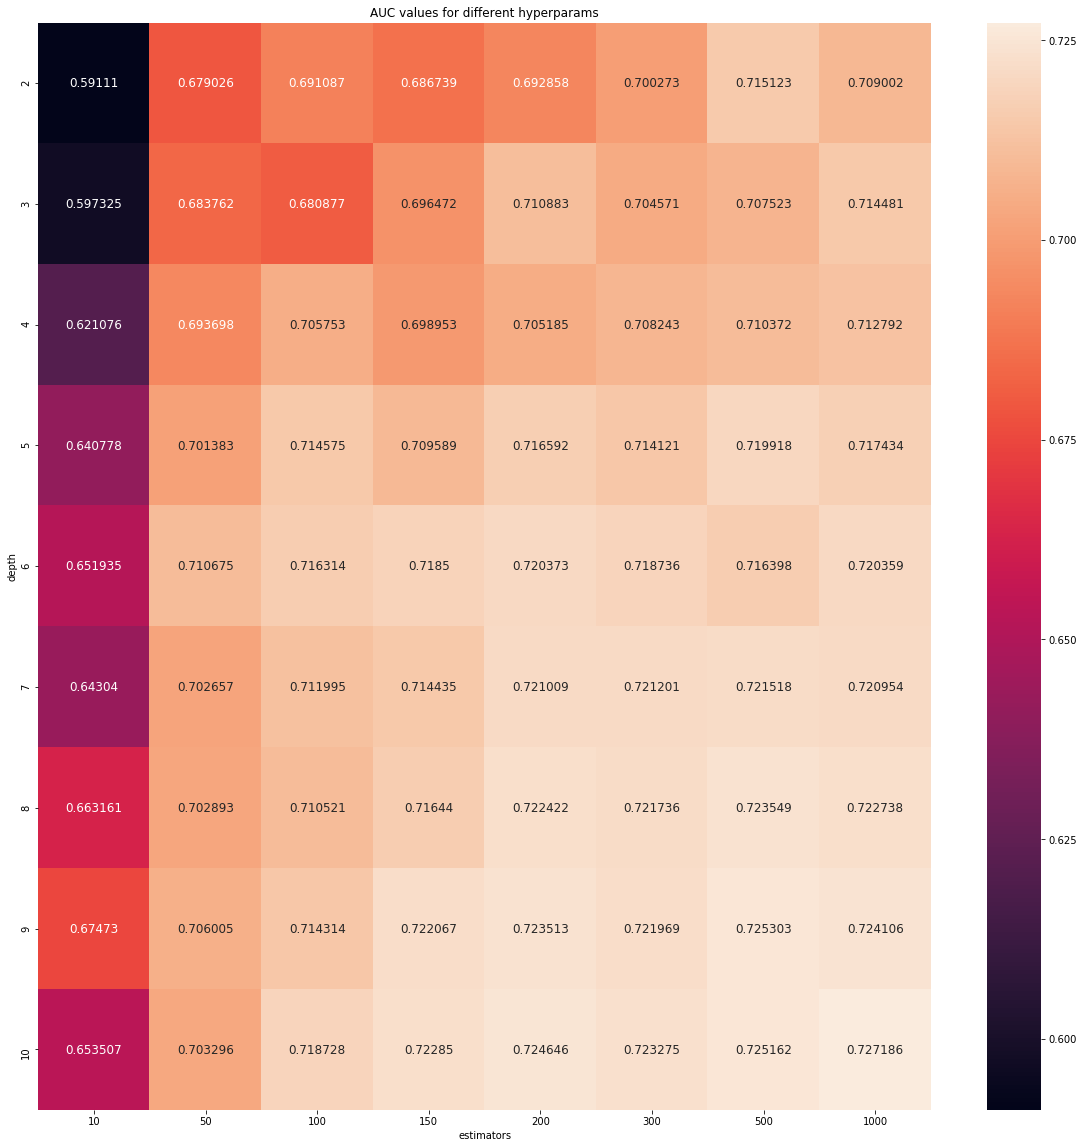

In [128]:
new_depth = []
new_estimators = []
for i in max_depth:
    new_estimators.extend(n_estimators)
    for j in n_estimators:
        new_depth.append(i)
    

drawMultiVariableHeatMap(new_depth,new_estimators, train_auc, cv_auc)

**Best Hyper parameter on cv data is:   (10, 1000)**

#### 6.3.1.2. Create Optimal Model

In [129]:
model_optimal = RandomForestClassifier(class_weight='balanced', max_depth = 10, n_estimators = 1000, n_jobs=-3)

In [130]:
model_optimal.fit(vectors_train, project_data_labels_train)
#print the order of classes/ labels in which prob scores will return
print(model_optimal.classes_)

[0 1]


The general class order is ascending in nature

In [131]:
train_pred = predict_prob(model_optimal, vectors_train)
cv_pred = predict_prob(model_optimal, vectors_cv)
test_pred = predict_prob(model_optimal, vectors_test)

#true positive and false positive values
train_fpr, train_tpr, tr_thresholds = getROCValues(train_pred,project_data_labels_train)
cv_fpr, cv_tpr, cv_thresholds = getROCValues(cv_pred,project_data_labels_cv)
test_fpr, test_tpr, te_thresholds = getROCValues(test_pred,project_data_labels_test)


####  6.3.1.3. ROC Curve for Test, CV and Train Data

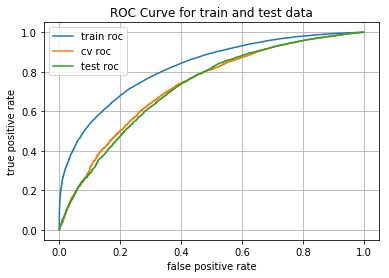

In [132]:
#ROC curves for train and test data sets

plt.plot(train_fpr,train_tpr, label = 'train roc')
plt.plot(cv_fpr,cv_tpr, label = 'cv roc')
plt.plot(test_fpr,test_tpr, label = 'test roc')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve for train and test data")
plt.grid('on')
plt.show()

In [133]:
print("The AUC value for train data is :",auc(train_fpr,train_tpr))
print("The AUC value for cv data is :",auc(cv_fpr,cv_tpr))
print("The AUC value for test data is :",auc(test_fpr,test_tpr))

The AUC value for train data is : 0.8235435492696114
The AUC value for cv data is : 0.727820866037298
The AUC value for test data is : 0.7231409798494011


<h4>Summary:</h4>
1. both train and test have AUC values grater than 0.6, model is performing better than random model

#### 6.3.1.4. Confusion matrices

##### 6.3.1.4.1. On Train Data

100%|██████████| 69918/69918 [00:00<00:00, 1547213.75it/s]



the maximum value of tpr*(1-fpr) 0.5498407746992932 for threshold 0.498


confusion matrix [[ 7569  3018]
 [14169 45162]]


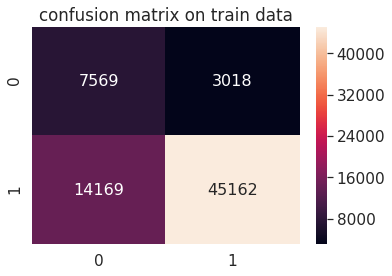

In [134]:
#draw confusion matrix for train data set
predictions_train = predict(train_pred, tr_thresholds, train_tpr, train_fpr)
print('\n')
cnf_matrix_train = findCnfMat(project_data_labels_train, predictions_train)
print('confusion matrix', cnf_matrix_train)
drawHeatMap(cnf_matrix_train, ['0','1'], ['0','1'], 'confusion matrix on train data')

<center><b>Confustion Matrix of Train Data for BOW encoding</b></center>

##### 6.3.1.4.2. On CV Data

100%|██████████| 17480/17480 [00:00<00:00, 1416523.70it/s]



the maximum value of tpr*(1-fpr) 0.4535809852906879 for threshold 0.503


confusion matrix [[1846  801]
 [5324 9509]]


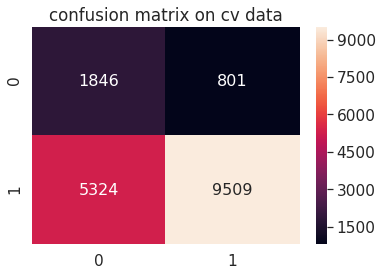

In [135]:
#draw confusion matrix for tecvst data set
predictions_cv = predict(cv_pred, cv_thresholds, cv_tpr, cv_fpr)
cnf_matrix_cv = findCnfMat(project_data_labels_cv, predictions_cv)
print('\n')
print('confusion matrix', cnf_matrix_cv)
drawHeatMap(cnf_matrix_cv, ['0','1'], ['0','1'], 'confusion matrix on cv data')


 
 ##### 6.3.1.4.3.Confusion Matrix on test data

100%|██████████| 21850/21850 [00:00<00:00, 1413694.02it/s]



the maximum value of tpr*(1-fpr) 0.4453337056158136 for threshold 0.504


confusion matrix [[ 2278  1030]
 [ 6797 11745]]


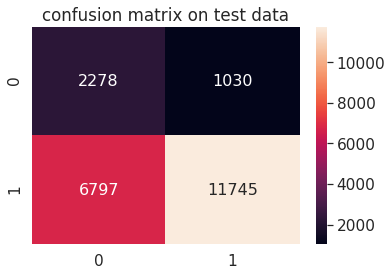

In [136]:
#draw confusion matrix for test data set
predictions_test = predict(test_pred, te_thresholds, test_tpr, test_fpr)
cnf_matrix_test = findCnfMat(project_data_labels_test, predictions_test)
print('\n')
print('confusion matrix', cnf_matrix_test)
drawHeatMap(cnf_matrix_test, ['0','1'], ['0','1'], 'confusion matrix on test data')

<center><b>Confustion Matrix of Test Data for BOW encoding</b></center>

### 6.3.2. categorical, numerical features + project_title(tf_idf) + preprocessed_essay (if_idf bigrams)

In [159]:
vectors_train = hstack((cat_num, train_tfidf_titles.tocsr(), train_tfidf_essays.tocsr()))
print(vectors_train.shape)
vectors_cv = hstack((cat_num_cv, cv_tfidf_titles.tocsr(), cv_tfidf_essays.tocsr()))
print(vectors_cv.shape)
vectors_test = hstack((cat_num_test, test_tfidf_titles.tocsr(), test_tfidf_essays.tocsr()))
print(vectors_test.shape)

(69918, 6013)
(17480, 6013)
(21850, 6013)


In [160]:
train_auc, cv_auc = ApplyModel(vectors_train, project_data_labels_train, vectors_cv, project_data_labels_cv, max_depth,
                         n_estimators)


  0%|          | 0/9 [00:00<?, ?it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**************************************************


applying CV to find best hyper parameter


100%|██████████| 9/9 [2:13:59<00:00, 1143.80s/it]

time taken for gridsearch cv is 8039.6917588710785


**************************************************




#### 6.3.2.1. Cross Validation vs hyperparameters

72
72
72


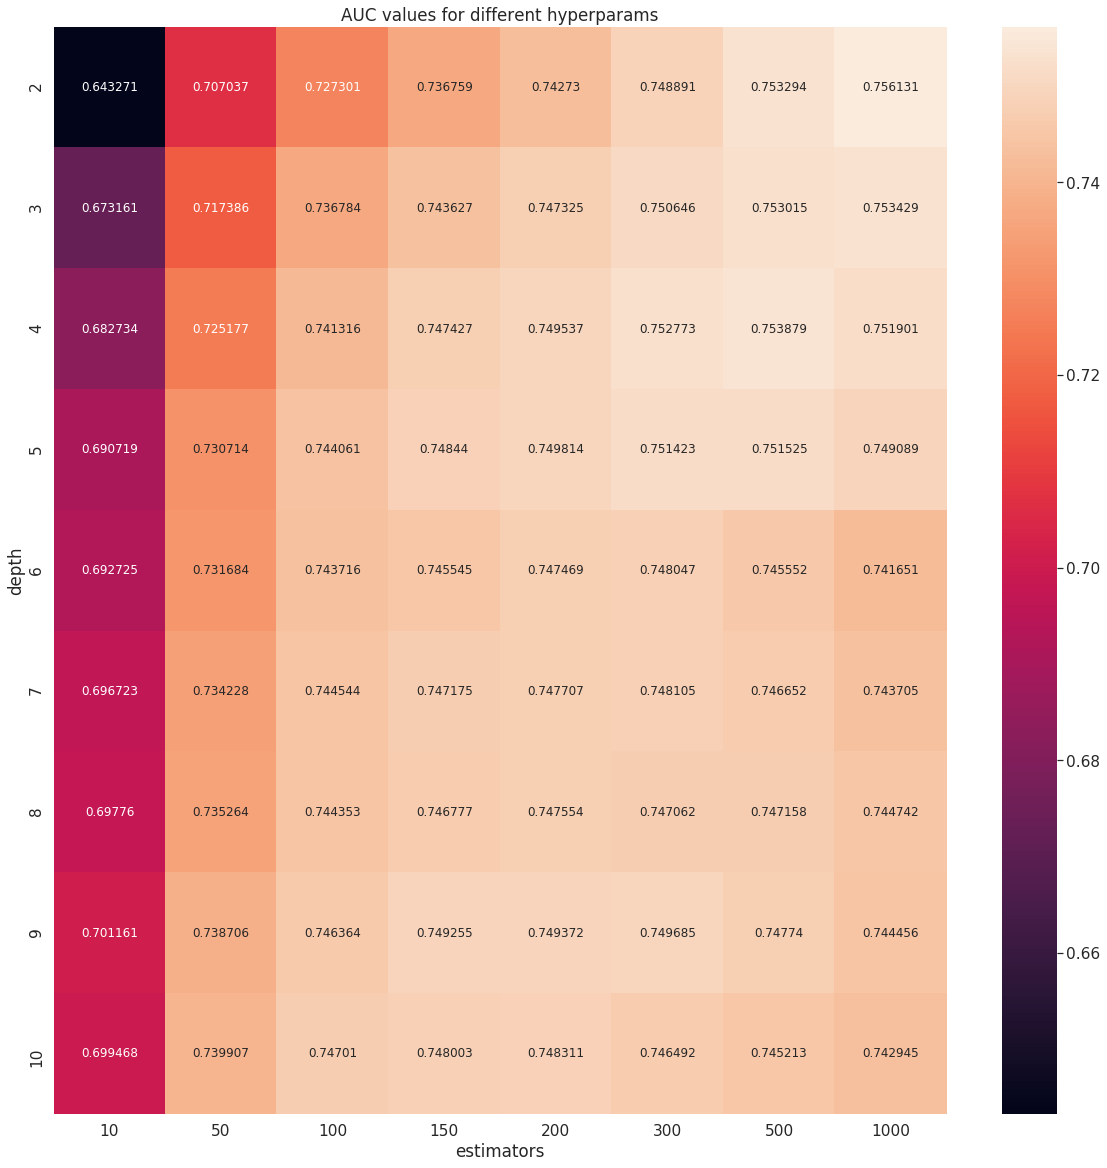

In [161]:
#print(train_auc)
drawMultiVariableHeatMap(new_depth,new_estimators, train_auc, cv_auc)

In [162]:
print('the best params are depth: 2, min split: 1000')

the best params are depth: 2, min split: 1000


#### 6.3.2.2. Creating Optimal model

In [163]:
model_optimal = RandomForestClassifier(class_weight='balanced', max_depth = 2, n_estimators = 1000, n_jobs=-3)

In [164]:
model_optimal.fit(vectors_train, project_data_labels_train)
#print the order of classes/ labels in which prob scores will return
print(model_optimal.classes_)

[0 1]


In [165]:
train_pred = predict_prob(model_optimal, vectors_train)
cv_pred = predict_prob(model_optimal, vectors_cv)
test_pred = predict_prob(model_optimal, vectors_test)

#true positive and false positive values
train_fpr, train_tpr, tr_thresholds = getROCValues(train_pred,project_data_labels_train)
cv_fpr, cv_tpr, cv_thresholds = getROCValues(cv_pred,project_data_labels_cv)
test_fpr, test_tpr, te_thresholds = getROCValues(test_pred,project_data_labels_test)

#### 6.3.2.3. ROC Curve for Test, CV and Train data

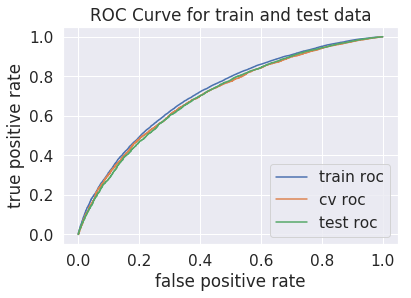

In [166]:
#ROC curves for train and test data sets

plt.plot(train_fpr,train_tpr, label = 'train roc')
plt.plot(cv_fpr,cv_tpr, label = 'cv roc')
plt.plot(test_fpr,test_tpr, label = 'test roc')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve for train and test data")
plt.grid('on')
plt.show()

In [167]:
print("The AUC value for train data is :",auc(train_fpr,train_tpr))
print("The AUC value for cv data is :",auc(cv_fpr,cv_tpr))
print("The AUC value for test data is :",auc(test_fpr,test_tpr))

The AUC value for train data is : 0.7193999140923485
The AUC value for cv data is : 0.70529101340345
The AUC value for test data is : 0.7035882914007964


#### 6.3.2.4. Confusion Matrices

##### 6.3.2.4.1 Confusion matrix for Train Data

100%|██████████| 69918/69918 [00:00<00:00, 1388509.38it/s]



the maximum value of tpr*(1-fpr) 0.43952992334413155 for threshold 0.501


confusion matrix [[ 7245  3342]
 [21492 37839]]


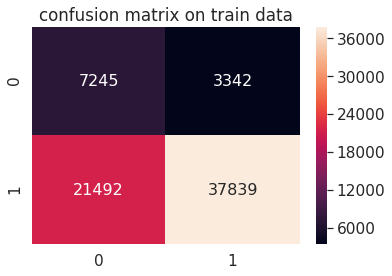

In [168]:
#draw confusion matrix for train data set
predictions_train = predict(train_pred, tr_thresholds, train_tpr, train_fpr)
print('\n')
cnf_matrix_train = findCnfMat(project_data_labels_train, predictions_train)
print('confusion matrix', cnf_matrix_train)
drawHeatMap(cnf_matrix_train, ['0','1'], ['0','1'], 'confusion matrix on train data')

<center><b>Confustion Matrix of Train Data for TF_IDF encoding</b></center>

##### 6.3.2.4.2. Confusion Matrix on CV data

100%|██████████| 17480/17480 [00:00<00:00, 1301852.62it/s]



the maximum value of tpr*(1-fpr) 0.42800949933691945 for threshold 0.498


confusion matrix [[ 1617  1030]
 [ 4631 10202]]


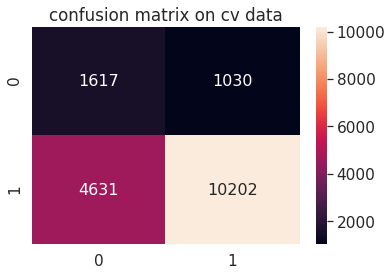

In [169]:
#draw confusion matrix for tecvst data set
predictions_cv = predict(cv_pred, cv_thresholds, cv_tpr, cv_fpr)
cnf_matrix_cv = findCnfMat(project_data_labels_cv, predictions_cv)
print('\n')
print('confusion matrix', cnf_matrix_cv)
drawHeatMap(cnf_matrix_cv, ['0','1'], ['0','1'], 'confusion matrix on cv data')

 ##### 6.3.2.4.3 Confusion Matrix on Test data

100%|██████████| 21850/21850 [00:00<00:00, 1260598.93it/s]



the maximum value of tpr*(1-fpr) 0.42550552247996215 for threshold 0.499


confusion matrix [[ 2189  1119]
 [ 6710 11832]]


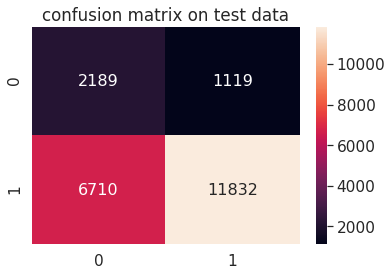

In [170]:
#draw confusion matrix for test data set
predictions_test = predict(test_pred, te_thresholds, test_tpr, test_fpr)
cnf_matrix_test = findCnfMat(project_data_labels_test, predictions_test)
print('\n')
print('confusion matrix', cnf_matrix_test)
drawHeatMap(cnf_matrix_test, ['0','1'], ['0','1'], 'confusion matrix on test data')

<center><b>Confustion Matrix of Test Data for TF_IDF encoding</b></center>

### 6.3.3. categorical, numerical features + project_title(avg_W2V) + preprocessed_essay (avg_W2V)

In [147]:
vectors_train = hstack((cat_num, csr_matrix(avg_w2v_vectors_train), avg_w2v_vectors_titles_train)).tocsr()
print(vectors_train.shape)
vectors_cv = hstack((cat_num_cv, csr_matrix(avg_w2v_vectors_cv), avg_w2v_vectors_titles_cv)).tocsr() 
print(vectors_cv.shape)
vectors_test = hstack((cat_num_test, csr_matrix(avg_w2v_vectors_test), avg_w2v_vectors_titles_test)).tocsr() 
print(vectors_test.shape)

(69918, 613)
(17480, 613)
(21850, 613)


In [150]:
train_auc, cv_auc = ApplyModel(vectors_train, project_data_labels_train, vectors_cv, project_data_labels_cv, max_depth,
                         n_estimators)





  0%|          | 0/9 [00:00<?, ?it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**************************************************


applying CV to find best hyper parameter





 11%|█         | 1/9 [04:37<37:02, 277.78s/it]


 22%|██▏       | 2/9 [11:07<36:19, 311.40s/it]


 33%|███▎      | 3/9 [19:45<37:19, 373.29s/it]


 44%|████▍     | 4/9 [30:49<38:22, 460.53s/it]


 56%|█████▌    | 5/9 [44:50<38:18, 574.64s/it]


 67%|██████▋   | 6/9 [1:02:23<35:54, 718.22s/it]


 78%|███████▊  | 7/9 [1:24:00<29:43, 891.82s/it]


 89%|████████▉ | 8/9 [1:49:35<18:04, 1084.73s/it]


100%|██████████| 9/9 [2:19:13<00:00, 1292.70s/it]

time taken for gridsearch cv is 8353.241902589798


**************************************************




#### 6.3.3.1. Cross Validation  Graph to find best hyperparameter

72
72
72


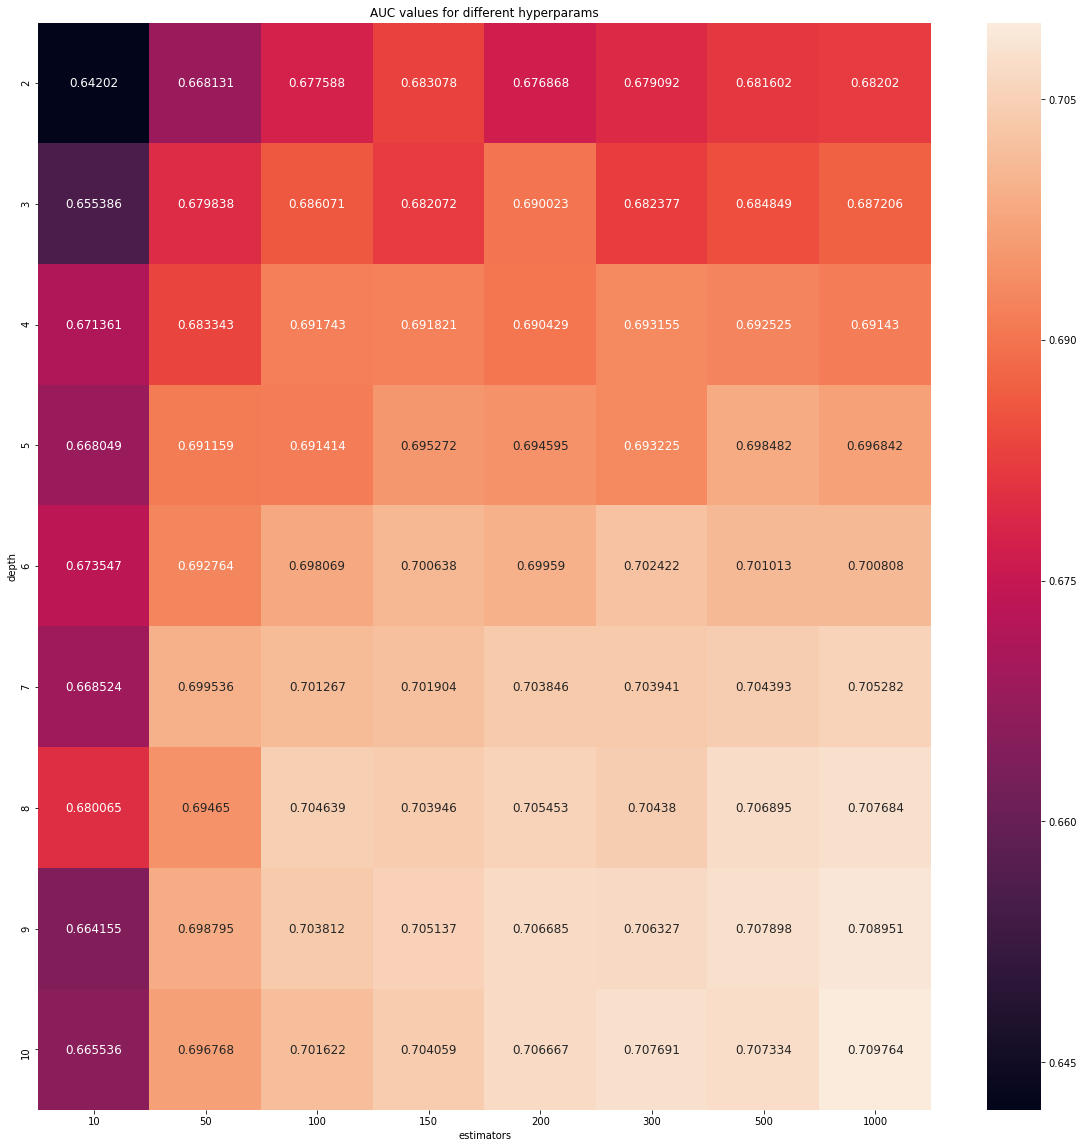

In [152]:
#print(train_auc)
new_depth = []
new_estimators = []
for i in max_depth:
    new_estimators.extend(n_estimators)
    for j in n_estimators:
        new_depth.append(i)
drawMultiVariableHeatMap(new_depth,new_estimators, train_auc, cv_auc)

In [164]:
print('the best params are depth: 6, min split: 300')

the best params are depth: 6, min split: 300




#### 6.3.3.2. Creating optimal model

In [165]:
model_optimal = RandomForestClassifier(class_weight='balanced', max_depth = 6, n_estimators = 300, n_jobs=-3)

In [166]:
model_optimal.fit(vectors_train, project_data_labels_train)
#print the order of classes/ labels in which prob scores will return
print(model_optimal.classes_)

[0 1]


In [167]:
train_pred = predict_prob(model_optimal, vectors_train)
cv_pred = predict_prob(model_optimal, vectors_cv)
test_pred = predict_prob(model_optimal, vectors_test)

#true positive and false positive values
train_fpr, train_tpr, tr_thresholds = getROCValues(train_pred,project_data_labels_train)
cv_fpr, cv_tpr, cv_thresholds = getROCValues(cv_pred,project_data_labels_cv)
test_fpr, test_tpr, te_thresholds = getROCValues(test_pred,project_data_labels_test)

#### 6.3.3.3. ROC Curve for Train, Test and CV data

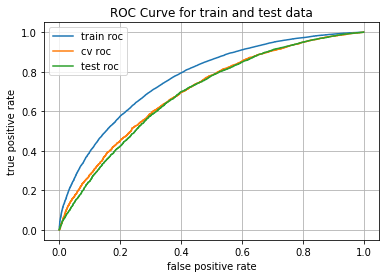

In [168]:
#ROC curves for train and test data sets

plt.plot(train_fpr,train_tpr, label = 'train roc')
plt.plot(cv_fpr,cv_tpr, label = 'cv roc')
plt.plot(test_fpr,test_tpr, label = 'test roc')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve for train and test data")
plt.grid('on')
plt.show()

In [169]:
print("The AUC value for train data is :",auc(train_fpr,train_tpr))
print("The AUC value for cv data is :",auc(cv_fpr,cv_tpr))
print("The AUC value for test data is :",auc(test_fpr,test_tpr))

The AUC value for train data is : 0.7715742510669605
The AUC value for cv data is : 0.7019801186110539
The AUC value for test data is : 0.6938887687510182


#### 6.3.3.4. Confusion matriices

##### 6.3.3.4.1 Confusion Matrix for Train data




  0%|          | 0/69918 [00:00<?, ?it/s]


100%|██████████| 69918/69918 [00:00<00:00, 1288256.17it/s]



the maximum value of tpr*(1-fpr) 0.49131770947841047 for threshold 0.513


confusion matrix [[ 7719  2868]
 [19849 39482]]


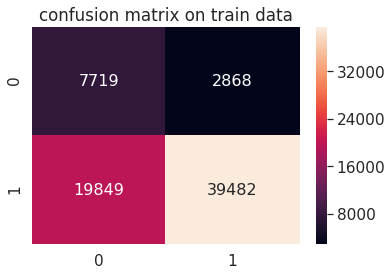

In [170]:
#draw confusion matrix for train data set
predictions_train = predict(train_pred, tr_thresholds, train_tpr, train_fpr)
print('\n')
cnf_matrix_train = findCnfMat(project_data_labels_train, predictions_train)
print('confusion matrix', cnf_matrix_train)
drawHeatMap(cnf_matrix_train, ['0','1'], ['0','1'], 'confusion matrix on train data')

##### 6.3.3.4.2. Confusion Matrix for CV data




  0%|          | 0/17480 [00:00<?, ?it/s]


100%|██████████| 17480/17480 [00:00<00:00, 1119762.26it/s]



the maximum value of tpr*(1-fpr) 0.4197756811504057 for threshold 0.504


confusion matrix [[1700  947]
 [5200 9633]]


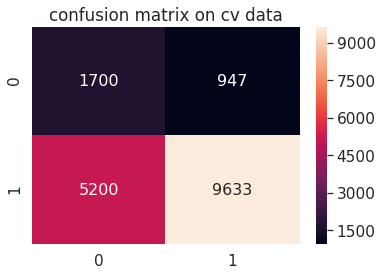

In [171]:
#draw confusion matrix for tecvst data set
predictions_cv = predict(cv_pred, cv_thresholds, cv_tpr, cv_fpr)
cnf_matrix_cv = findCnfMat(project_data_labels_cv, predictions_cv)
print('\n')
print('confusion matrix', cnf_matrix_cv)
drawHeatMap(cnf_matrix_cv, ['0','1'], ['0','1'], 'confusion matrix on cv data')


 ##### 6.3.3.4.3. Confusion Matrix for Test data




  0%|          | 0/21850 [00:00<?, ?it/s]


100%|██████████| 21850/21850 [00:00<00:00, 1266032.25it/s]



the maximum value of tpr*(1-fpr) 0.42008744942851406 for threshold 0.511


confusion matrix [[ 2241  1067]
 [ 7373 11169]]


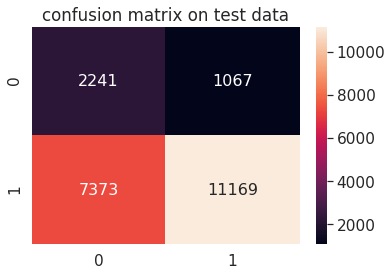

In [172]:
#draw confusion matrix for test data set
predictions_test = predict(test_pred, te_thresholds, test_tpr, test_fpr)
cnf_matrix_test = findCnfMat(project_data_labels_test, predictions_test)
print('\n')
print('confusion matrix', cnf_matrix_test)
drawHeatMap(cnf_matrix_test, ['0','1'], ['0','1'], 'confusion matrix on test data')

### 6.3.4. categorical, numerical features + project_title(tf_IDF_avg_W2V) + preprocessed_essay (tf_IDF_avg_W2V)

In [180]:
#train data
from scipy.sparse import csr_matrix

#stack list must contain atleast one sparse matrix
#https://stackoverflow.com/a/55756295
vectors_train = hstack((cat_num, csr_matrix(tfidf_w2v_vectors_train_essays),
               tfidf_w2v_vectors_train_titles)).tocsr()
print(vectors_train.shape)
#cv data
vectors_cv = hstack((cat_num_cv, csr_matrix(tfidf_w2v_vectors_cv_essays), 
                    tfidf_w2v_vectors_cv_titles)).tocsr() 
print(vectors_cv.shape)
#test data
print(len(tfidf_w2v_vectors_test_titles))
vectors_test = hstack((cat_num_test, csr_matrix(tfidf_w2v_vectors_test_essays), 
                    tfidf_w2v_vectors_test_titles)).tocsr() 
print(vectors_test.shape)

(69918, 613)
(17480, 613)
21850
(21850, 613)


In [174]:
#apply the model
train_auc, cv_auc = ApplyModel(vectors_train, project_data_labels_train, vectors_cv, project_data_labels_cv, max_depth,
                         n_estimators)





  0%|          | 0/9 [00:00<?, ?it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**************************************************


applying CV to find best hyper parameter





 11%|█         | 1/9 [04:20<34:41, 260.24s/it]


 22%|██▏       | 2/9 [10:08<33:27, 286.77s/it]


 33%|███▎      | 3/9 [17:41<33:39, 336.52s/it]


 44%|████▍     | 4/9 [27:56<35:00, 420.01s/it]


 56%|█████▌    | 5/9 [41:07<35:25, 531.29s/it]


 67%|██████▋   | 6/9 [57:18<33:10, 663.37s/it]


 78%|███████▊  | 7/9 [1:18:17<28:03, 841.84s/it]


 89%|████████▉ | 8/9 [1:43:37<17:25, 1045.37s/it]


100%|██████████| 9/9 [2:14:06<00:00, 1280.47s/it]

time taken for gridsearch cv is 8046.417677640915


**************************************************




#### 6.3.4.1. Cross Validation Graph to find best hyperparameter

72
72
72


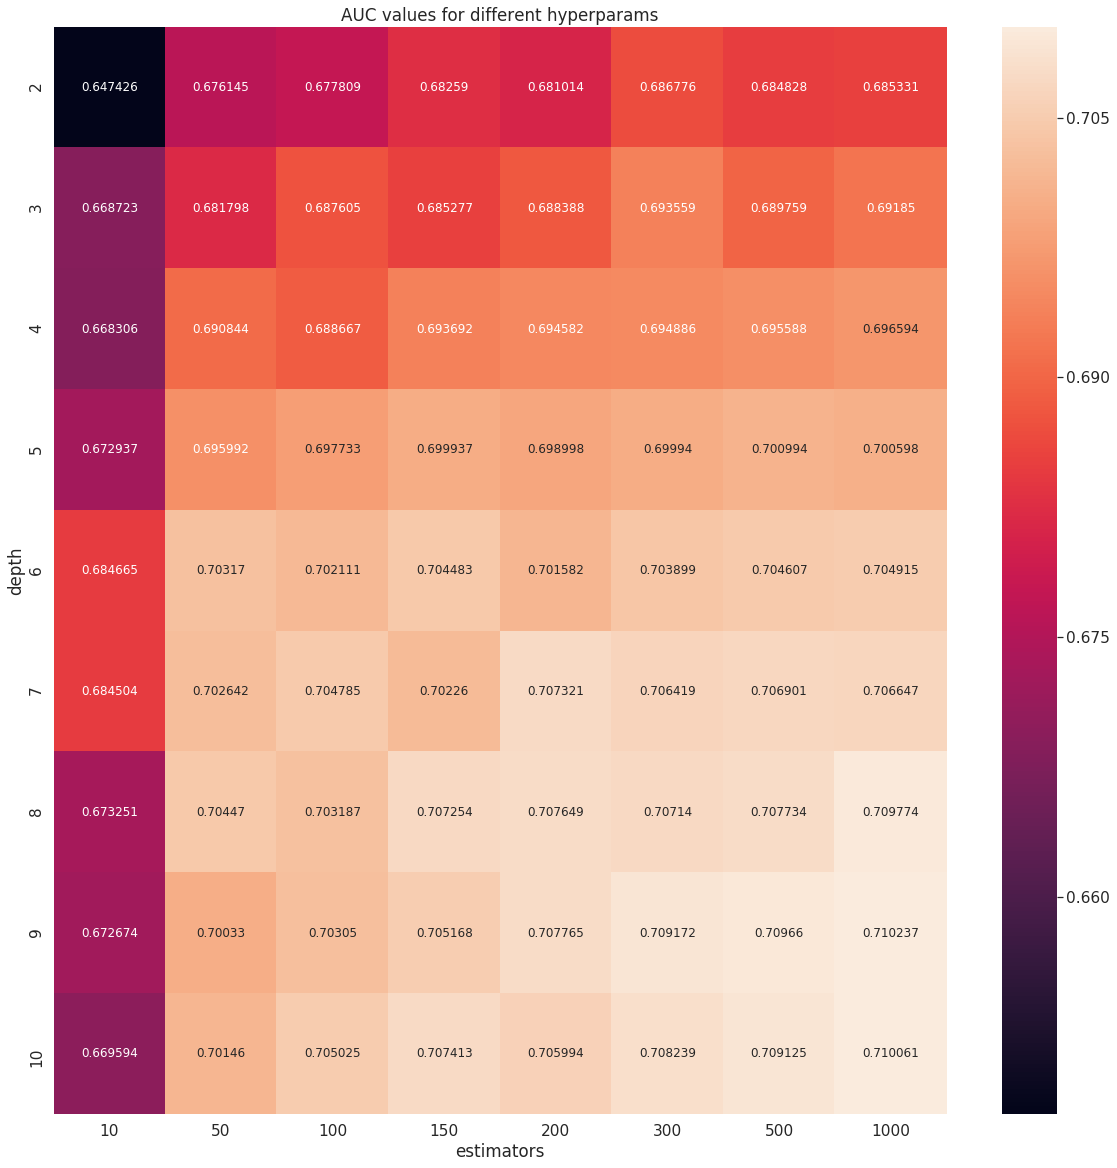

In [175]:
#print(train_auc)
drawMultiVariableHeatMap(new_depth,new_estimators, train_auc, cv_auc)

In [202]:
print('the best params are depth: 7, min split: 200')

the best params are depth: 5, min split: 500


#### 6.3.4.2. Creating Optimal Model

In [178]:
model_optimal = RandomForestClassifier(class_weight='balanced', max_depth = 7, n_estimators = 200, n_jobs=-3)

In [181]:
model_optimal.fit(vectors_train, project_data_labels_train)
#print the order of classes/ labels in which prob scores will return
print(model_optimal.classes_)

[0 1]


In [182]:
train_pred = predict_prob(model_optimal, vectors_train)
cv_pred = predict_prob(model_optimal, vectors_cv)
test_pred = predict_prob(model_optimal, vectors_test)

#true positive and false positive values
train_fpr, train_tpr, tr_thresholds = getROCValues(train_pred,project_data_labels_train)
cv_fpr, cv_tpr, cv_thresholds = getROCValues(cv_pred,project_data_labels_cv)
test_fpr, test_tpr, te_thresholds = getROCValues(test_pred,project_data_labels_test)


#### 6.3.4.3. ROC curve for train, cv  and test data

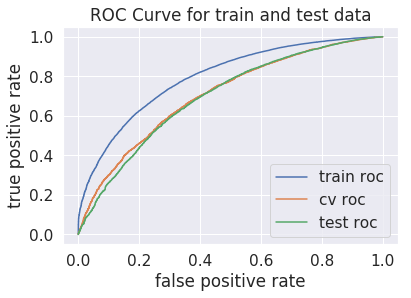

In [183]:
#ROC curves for train and test data sets

plt.plot(train_fpr,train_tpr, label = 'train roc')
plt.plot(cv_fpr,cv_tpr, label = 'cv roc')
plt.plot(test_fpr,test_tpr, label = 'test roc')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve for train and test data")
plt.grid('on')
plt.show()

In [184]:
print("The AUC value for train data is :",auc(train_fpr,train_tpr))
print("The AUC value for cv data is :",auc(cv_fpr,cv_tpr))
print("The AUC value for test data is :",auc(test_fpr,test_tpr))

The AUC value for train data is : 0.7954577142391849
The AUC value for cv data is : 0.7055211667610009
The AUC value for test data is : 0.696842535466721


#### 6.3.4.4. Confusion Matrices

##### 6.3.4.4.1. Confusion Matrix for Train data




  0%|          | 0/69918 [00:00<?, ?it/s]


100%|██████████| 69918/69918 [00:00<00:00, 1520263.70it/s]



the maximum value of tpr*(1-fpr) 0.5183067962289779 for threshold 0.506


confusion matrix [[ 7785  2802]
 [17768 41563]]


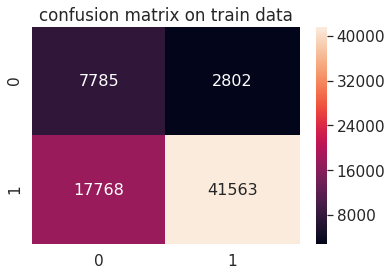

In [185]:
#draw confusion matrix for train data set
predictions_train = predict(train_pred, tr_thresholds, train_tpr, train_fpr)
print('\n')
cnf_matrix_train = findCnfMat(project_data_labels_train, predictions_train)
print('confusion matrix', cnf_matrix_train)
drawHeatMap(cnf_matrix_train, ['0','1'], ['0','1'], 'confusion matrix on train data')

##### 6.3.4.4.2. Confusion Matrix for CV Data




  0%|          | 0/17480 [00:00<?, ?it/s]


100%|██████████| 17480/17480 [00:00<00:00, 1152067.66it/s]



the maximum value of tpr*(1-fpr) 0.42620678206281537 for threshold 0.507


confusion matrix [[1765  882]
 [5469 9364]]


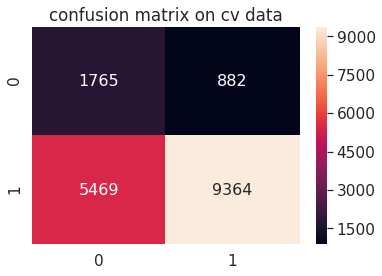

In [186]:
#draw confusion matrix for tecvst data set
predictions_cv = predict(cv_pred, cv_thresholds, cv_tpr, cv_fpr)
cnf_matrix_cv = findCnfMat(project_data_labels_cv, predictions_cv)
print('\n')
print('confusion matrix', cnf_matrix_cv)
drawHeatMap(cnf_matrix_cv, ['0','1'], ['0','1'], 'confusion matrix on cv data')


 
 ##### 6.3.4.4.3. Confusion Matrix for Test Data




  0%|          | 0/21850 [00:00<?, ?it/s]


100%|██████████| 21850/21850 [00:00<00:00, 1184479.43it/s]



the maximum value of tpr*(1-fpr) 0.4197940373154603 for threshold 0.506


confusion matrix [[ 2161  1147]
 [ 6730 11812]]


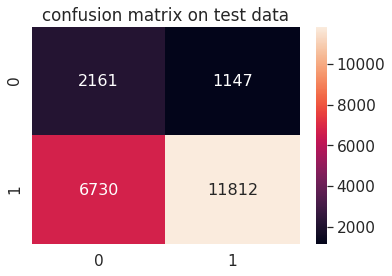

In [187]:
#draw confusion matrix for test data set
predictions_test = predict(test_pred, te_thresholds, test_tpr, test_fpr)
cnf_matrix_test = findCnfMat(project_data_labels_test, predictions_test)
print('\n')
print('confusion matrix', cnf_matrix_test)
drawHeatMap(cnf_matrix_test, ['0','1'], ['0','1'], 'confusion matrix on test data')

## 7.0. Applying GBDT on data set

### 7.1.1. Create XGBOOST model funtion

In [2]:
#!sudo pip3 install xgboost

    100% |████████████████████████████████| 142.8MB 9.6kB/s 


In [188]:
from xgboost import XGBClassifier
def applyCustomCV(data_train, data_train_labels,data_cv, data_cv_labels, n_estimators, depth):
    auc_train = []
    auc_cv = []
    for i in tqdm(depth):
        for j in n_estimators:
            #print(j)
            model = XGBClassifier(class_weight='balanced', max_depth = i, n_estimators = j, n_jobs=-3)
            model.fit(data_train, data_train_labels)
            prob_scores_train = predict_prob(model, data_train)
            auc_score_trian = calAucScore(data_train_labels, prob_scores_train)
            auc_train.append(auc_score_trian)
            prob_scores_cv = predict_prob(model, data_cv)
            auc_score_cv = calAucScore(data_cv_labels, prob_scores_cv)
            auc_cv.append(auc_score_cv)
            
            
    
    return auc_train, auc_cv

In [189]:
def ApplyXGBoostModel(data_train, labels_train, data_test,labels_test, hyperparams, n_estimators):
    print(hyperparams)
    print('\n')
    print('*' * 50)
    print('\n')
    print('applying CV to find best hyper parameter')
    
    t1 = time.time()
    #optimal_hyp = applyRandomSearchCV(hyperparams,min_sample_split,data_train, labels_train)
    train_auc, cv_auc = applyCustomCV(data_train, labels_train,data_test,
                                        labels_test, n_estimators, hyperparams)
    print('time taken for gridsearch cv is', time.time() - t1)
    '''print('optimal hyper param is:', optimal_hyp['max_depth'])
    print('best penalty is:', optimal_hyp['min_samples_split'])'''
    print('\n')
    print('*' * 50)
    print('\n')
    return train_auc, cv_auc

### 7.1.2. Apply model for BOW vectors

In [142]:
vectors_train = hstack((cat_num[:30000], train_titles_bow[:30000].tocsr(), train_essay_bow[:30000].tocsr()))
print(vectors_train.shape)
print(type(vectors_train))
vectors_cv = hstack((cat_num_cv, cv_titles_bow.tocsr(), cv_essay_bow.tocsr()))
print(vectors_cv.shape)
print(type(vectors_cv))
vectors_test = hstack((cat_num_test, test_titles_bow.tocsr(), test_essay_bow.tocsr()))
print(vectors_test.shape)
print(type(vectors_test))

(30000, 6013)
<class 'scipy.sparse.coo.coo_matrix'>
(17480, 6013)
<class 'scipy.sparse.coo.coo_matrix'>
(21850, 6013)
<class 'scipy.sparse.coo.coo_matrix'>


In [143]:
train_auc, cv_auc = ApplyXGBoostModel(vectors_train, project_data_labels_train[:30000], vectors_cv, project_data_labels_cv,
                                      max_depth, n_estimators)


  0%|          | 0/9 [00:00<?, ?it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**************************************************


applying CV to find best hyper parameter


100%|██████████| 9/9 [20:51<00:00, 174.16s/it]

time taken for gridsearch cv is 1251.5019433498383


**************************************************




72
72
72


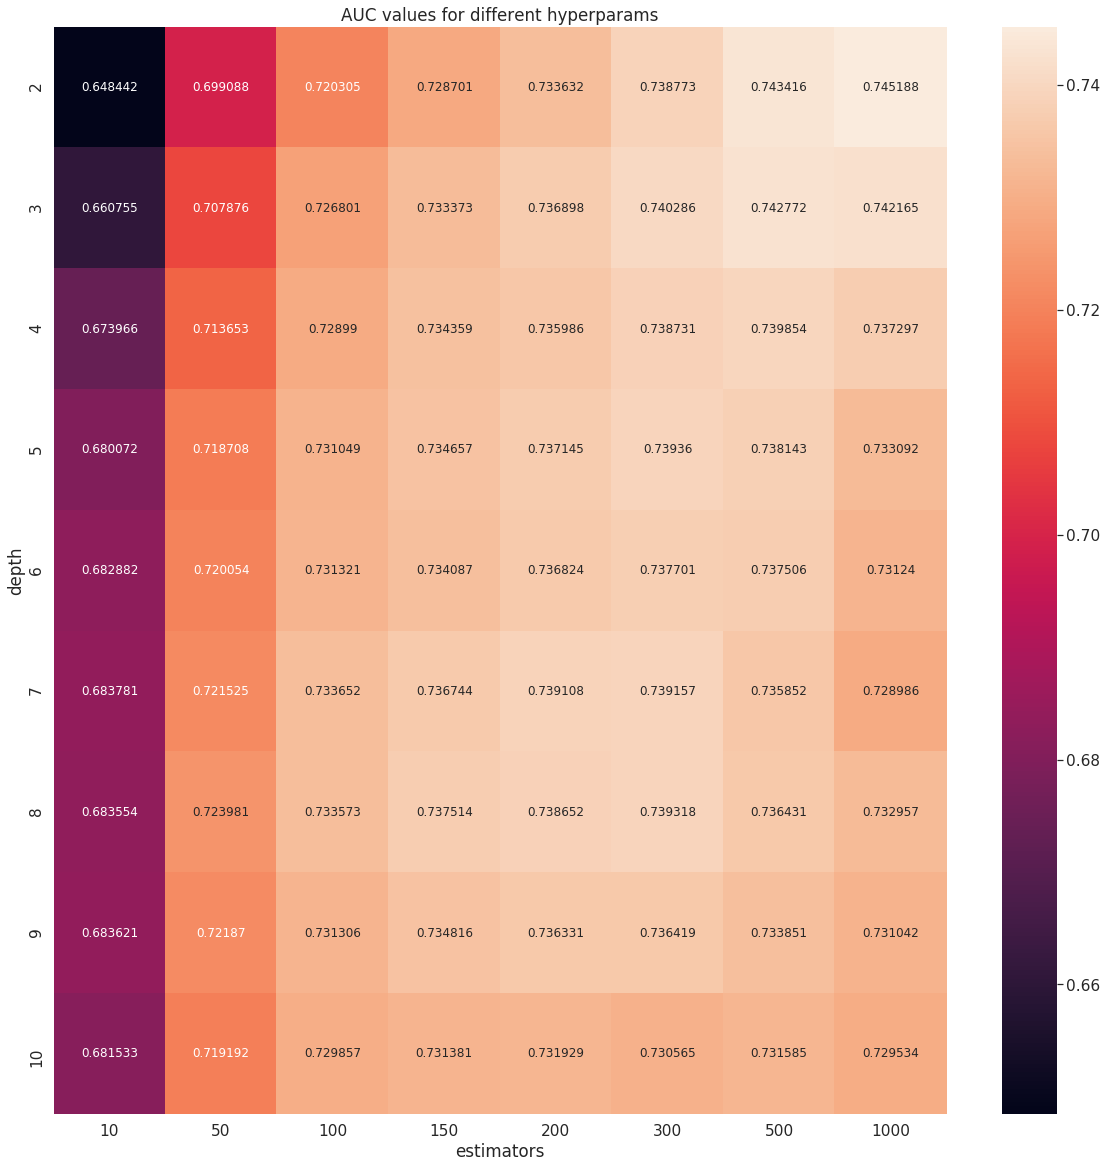

In [144]:
drawMultiVariableHeatMap(new_depth,new_estimators, train_auc, cv_auc)

#### 7.1.2.1. Optimal Model

In [146]:
model_optimal = XGBClassifier(class_weight='balanced', max_depth = 2, n_estimators = 1000, n_jobs=-3)

In [148]:
model_optimal.fit(vectors_train, project_data_labels_train[:30000])
#print the order of classes/ labels in which prob scores will return
print(model_optimal.classes_)

[0 1]


In [150]:
train_pred = predict_prob(model_optimal, vectors_train)
cv_pred = predict_prob(model_optimal, vectors_cv)
test_pred = predict_prob(model_optimal, vectors_test)

#true positive and false positive values
train_fpr, train_tpr, tr_thresholds = getROCValues(train_pred,project_data_labels_train[:30000])
cv_fpr, cv_tpr, cv_thresholds = getROCValues(cv_pred,project_data_labels_cv)
test_fpr, test_tpr, te_thresholds = getROCValues(test_pred,project_data_labels_test)

#### 7.1.2.2. ROC Curve On Train, Test and CV 

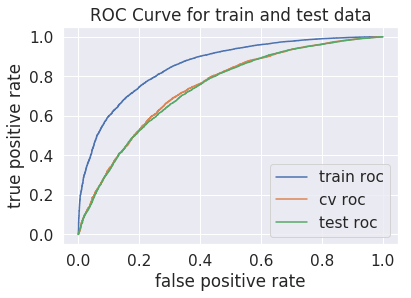

In [151]:
#ROC curves for train and test data sets

plt.plot(train_fpr,train_tpr, label = 'train roc')
plt.plot(cv_fpr,cv_tpr, label = 'cv roc')
plt.plot(test_fpr,test_tpr, label = 'test roc')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve for train and test data")
plt.grid('on')
plt.show()

In [152]:
print("The AUC value for train data is :",auc(train_fpr,train_tpr))
print("The AUC value for cv data is :",auc(cv_fpr,cv_tpr))
print("The AUC value for test data is :",auc(test_fpr,test_tpr))

The AUC value for train data is : 0.8581248472519616
The AUC value for cv data is : 0.7451878362377806
The AUC value for test data is : 0.7406940819476213


#### 7.1.2.3. Confusion Matrices

##### 7.1.2.3.1. On Train Data set

100%|██████████| 30000/30000 [00:00<00:00, 1487552.84it/s]



the maximum value of tpr*(1-fpr) 0.6007636678026474 for threshold 0.835


confusion matrix [[ 3661   884]
 [ 6737 18718]]


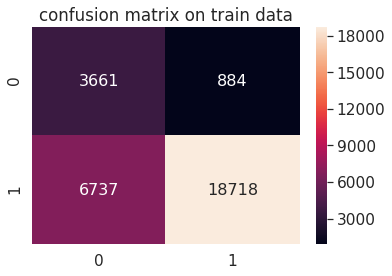

In [154]:
#draw confusion matrix for train data set
predictions_train = predict(train_pred, tr_thresholds, train_tpr, train_fpr)
print('\n')
cnf_matrix_train = findCnfMat(project_data_labels_train[:30000], predictions_train)
print('confusion matrix', cnf_matrix_train)
drawHeatMap(cnf_matrix_train, ['0','1'], ['0','1'], 'confusion matrix on train data')

##### 7.1.2.3.2. On  CV Data set

100%|██████████| 17480/17480 [00:00<00:00, 1344786.84it/s]



the maximum value of tpr*(1-fpr) 0.47653848025839934 for threshold 0.821


confusion matrix [[1967  680]
 [5750 9083]]


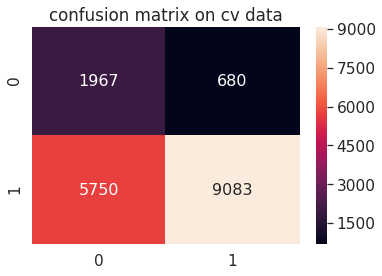

In [155]:
#draw confusion matrix for tecvst data set
predictions_cv = predict(cv_pred, cv_thresholds, cv_tpr, cv_fpr)
cnf_matrix_cv = findCnfMat(project_data_labels_cv, predictions_cv)
print('\n')
print('confusion matrix', cnf_matrix_cv)
drawHeatMap(cnf_matrix_cv, ['0','1'], ['0','1'], 'confusion matrix on cv data')

##### 7.1.2.3.3. On Test Dataset

100%|██████████| 21850/21850 [00:00<00:00, 1337168.86it/s]



the maximum value of tpr*(1-fpr) 0.4644890152321922 for threshold 0.816


confusion matrix [[ 2370   938]
 [ 6814 11728]]


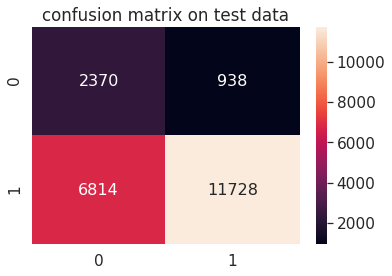

In [156]:
#draw confusion matrix for test data set
predictions_test = predict(test_pred, te_thresholds, test_tpr, test_fpr)
cnf_matrix_test = findCnfMat(project_data_labels_test, predictions_test)
print('\n')
print('confusion matrix', cnf_matrix_test)
drawHeatMap(cnf_matrix_test, ['0','1'], ['0','1'], 'confusion matrix on test data')

## 7.1.3.0. Apply XGBoost on TFIDF vectors

In [226]:
vectors_train = hstack((cat_num[:30000], train_tfidf_titles[:30000].tocsr(), train_tfidf_essays[:30000].tocsr()))
print(vectors_train.shape)
vectors_cv = hstack((cat_num_cv, cv_tfidf_titles.tocsr(), cv_tfidf_essays.tocsr()))
print(vectors_cv.shape)
vectors_test = hstack((cat_num_test, test_tfidf_titles.tocsr(), test_tfidf_essays.tocsr()))
print(vectors_test.shape)

(30000, 6013)
(17480, 6013)
(21850, 6013)


#### 7.1.3.1. Applying Model

In [193]:
train_auc, cv_auc = ApplyXGBoostModel(vectors_train, project_data_labels_train[:30000], vectors_cv, project_data_labels_cv,
                                      max_depth, n_estimators)




  0%|          | 0/9 [00:00<?, ?it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**************************************************


applying CV to find best hyper parameter





 11%|█         | 1/9 [02:27<19:40, 147.60s/it]


 22%|██▏       | 2/9 [05:53<19:15, 165.06s/it]


 33%|███▎      | 3/9 [10:18<19:30, 195.05s/it]


 44%|████▍     | 4/9 [15:45<19:33, 234.79s/it]


 56%|█████▌    | 5/9 [22:14<18:43, 280.77s/it]


 67%|██████▋   | 6/9 [29:39<16:30, 330.03s/it]


 78%|███████▊  | 7/9 [38:00<12:43, 381.51s/it]


 89%|████████▉ | 8/9 [47:19<07:14, 434.59s/it]


100%|██████████| 9/9 [57:42<00:00, 491.30s/it]

time taken for gridsearch cv is 3462.6757493019104


**************************************************




72
72
72


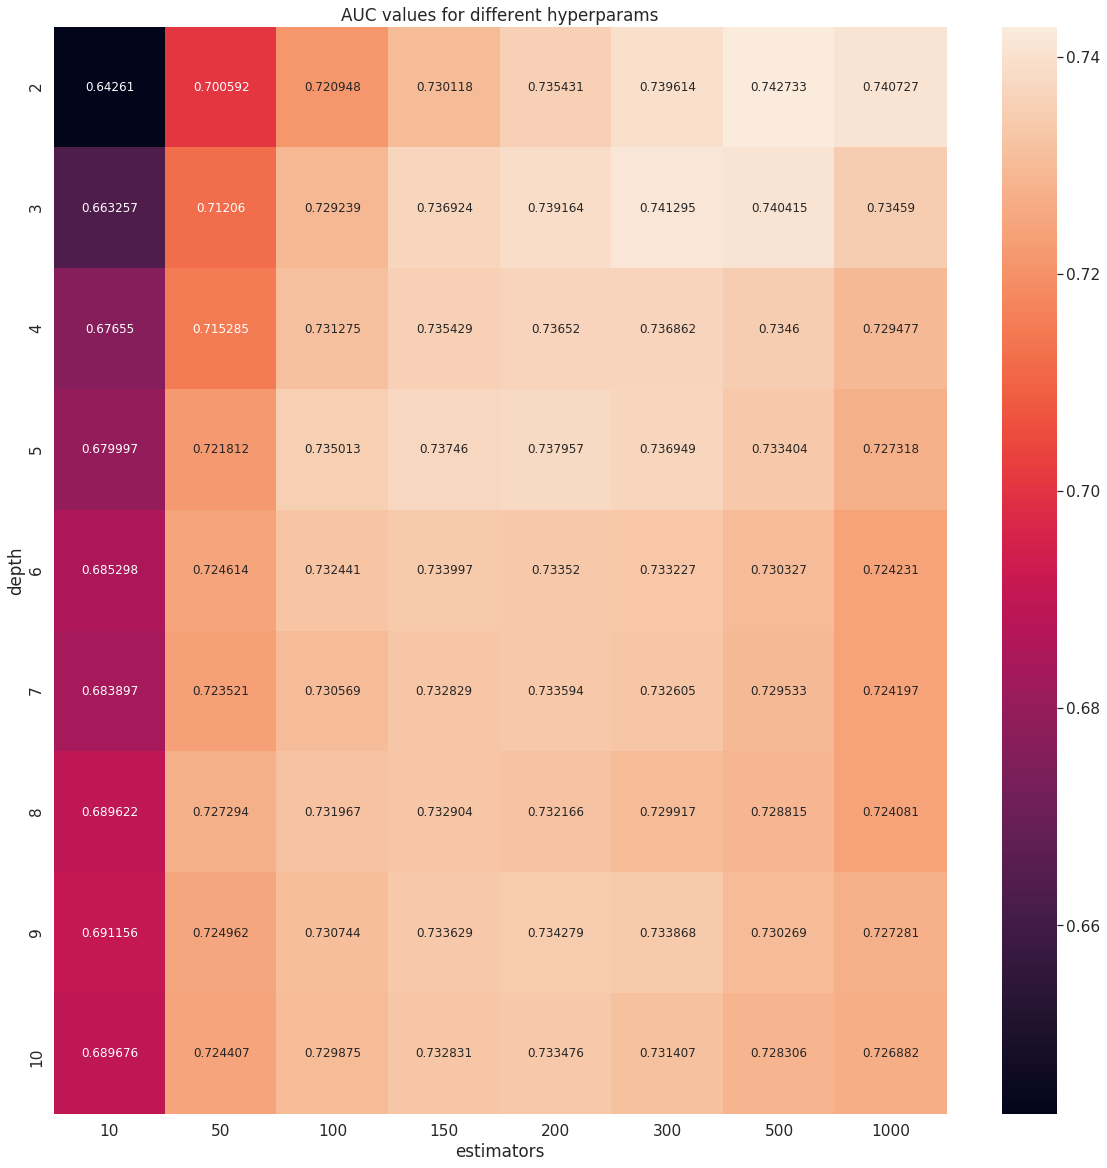

In [ ]:
drawMultiVariableHeatMap(new_depth,new_estimators, train_auc, cv_auc)

In [227]:
print('best hyperparams are max_depth: 3 and estimators: 300')

best hyperparams are max_depth: 3 and estimators: 300


#### 7.1.3.2. Optimal Model

In [228]:
model_optimal = XGBClassifier(class_weight='balanced', max_depth = 3, n_estimators = 300, n_jobs=-3)

In [229]:
model_optimal.fit(vectors_train, project_data_labels_train[:30000])
#print the order of classes/ labels in which prob scores will return
print(model_optimal.classes_)

[0 1]


#### 7.1.3.3. Roc Curve

In [230]:
train_pred = predict_prob(model_optimal, vectors_train)
cv_pred = predict_prob(model_optimal, vectors_cv)
test_pred = predict_prob(model_optimal, vectors_test)

In [231]:
#true positive and false positive values
train_fpr, train_tpr, tr_thresholds = getROCValues(train_pred,project_data_labels_train[:30000])
cv_fpr, cv_tpr, cv_thresholds = getROCValues(cv_pred,project_data_labels_cv)
test_fpr, test_tpr, te_thresholds = getROCValues(test_pred,project_data_labels_test)

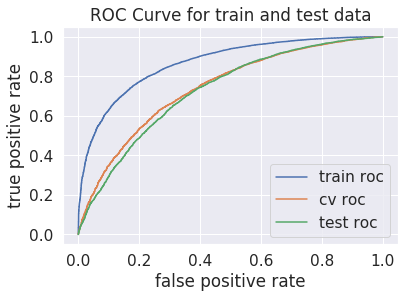

In [232]:
#ROC curves for train and test data sets

plt.plot(train_fpr,train_tpr, label = 'train roc')
plt.plot(cv_fpr,cv_tpr, label = 'cv roc')
plt.plot(test_fpr,test_tpr, label = 'test roc')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve for train and test data")
plt.grid('on')
plt.show()

In [233]:
print("The AUC value for train data is :",auc(train_fpr,train_tpr))
print("The AUC value for cv data is :",auc(cv_fpr,cv_tpr))
print("The AUC value for test data is :",auc(test_fpr,test_tpr))

The AUC value for train data is : 0.8679079737119968
The AUC value for cv data is : 0.7412954008474809
The AUC value for test data is : 0.7279264976652893


#### 7.1.3.4. Confusion Matrices

##### 7.1.3.4.1. On Train Data





  0%|          | 0/30000 [00:00<?, ?it/s]



100%|██████████| 30000/30000 [00:00<00:00, 1378269.57it/s]



the maximum value of tpr*(1-fpr) 0.6180428321402398 for threshold 0.81


confusion matrix [[ 3446  1166]
 [ 4743 20645]]


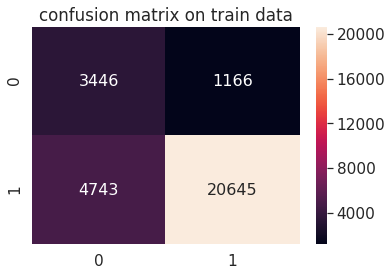

In [234]:
#draw confusion matrix for train data set
predictions_train = predict(train_pred, tr_thresholds, train_tpr, train_fpr)
print('\n')
cnf_matrix_train = findCnfMat(project_data_labels_train[:30000], predictions_train)
print('confusion matrix', cnf_matrix_train)
drawHeatMap(cnf_matrix_train, ['0','1'], ['0','1'], 'confusion matrix on train data')

##### 7.1.3.4.2. On CV Data





  0%|          | 0/17480 [00:00<?, ?it/s]



100%|██████████| 17480/17480 [00:00<00:00, 1255138.99it/s]



the maximum value of tpr*(1-fpr) 0.46252702706936116 for threshold 0.797


confusion matrix [[1804  843]
 [4849 9984]]


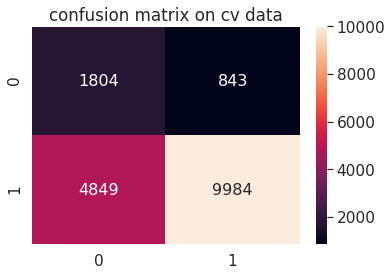

In [235]:
#draw confusion matrix for tecvst data set
predictions_cv = predict(cv_pred, cv_thresholds, cv_tpr, cv_fpr)
cnf_matrix_cv = findCnfMat(project_data_labels_cv, predictions_cv)
print('\n')
print('confusion matrix', cnf_matrix_cv)
drawHeatMap(cnf_matrix_cv, ['0','1'], ['0','1'], 'confusion matrix on cv data')

##### 7.1.3.4.3. On Test Data





  0%|          | 0/21850 [00:00<?, ?it/s]



100%|██████████| 21850/21850 [00:00<00:00, 1290400.62it/s]



the maximum value of tpr*(1-fpr) 0.45188563054404934 for threshold 0.821


confusion matrix [[ 2378   930]
 [ 7372 11170]]


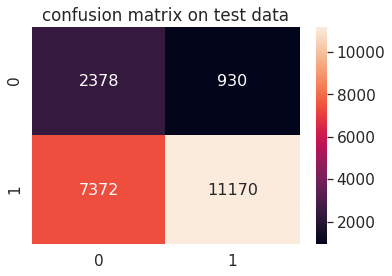

In [236]:
#draw confusion matrix for test data set
predictions_test = predict(test_pred, te_thresholds, test_tpr, test_fpr)
cnf_matrix_test = findCnfMat(project_data_labels_test, predictions_test)
print('\n')
print('confusion matrix', cnf_matrix_test)
drawHeatMap(cnf_matrix_test, ['0','1'], ['0','1'], 'confusion matrix on test data')

#### 7.1.4.0. Apply XGBoost on avg word vectors

In [215]:
vectors_train = hstack((cat_num[:30000], csr_matrix(avg_w2v_vectors_train[:30000]),
                        avg_w2v_vectors_titles_train[:30000])).tocsr()
print(vectors_train.shape)
vectors_cv = hstack((cat_num_cv, csr_matrix(avg_w2v_vectors_cv), avg_w2v_vectors_titles_cv)).tocsr() 
print(vectors_cv.shape)
vectors_test = hstack((cat_num_test, csr_matrix(avg_w2v_vectors_test), avg_w2v_vectors_titles_test)).tocsr() 
print(vectors_test.shape)

(30000, 613)
(17480, 613)
(21850, 613)


#### 7.1.4.1. Apply Model

In [ ]:
train_auc, cv_auc = ApplyXGBoostModel(vectors_train, project_data_labels_train[:30000], vectors_cv, project_data_labels_cv,
                                      max_depth, n_estimators)




  0%|          | 0/9 [00:00<?, ?it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**************************************************


applying CV to find best hyper parameter





 11%|█         | 1/9 [10:24<1:23:19, 624.96s/it]


 22%|██▏       | 2/9 [25:02<1:21:44, 700.60s/it]


 33%|███▎      | 3/9 [44:03<1:23:17, 832.84s/it]


 44%|████▍     | 4/9 [1:07:52<1:24:18, 1011.65s/it]


 56%|█████▌    | 5/9 [1:36:19<1:21:21, 1220.43s/it]


 67%|██████▋   | 6/9 [2:09:16<1:12:22, 1447.37s/it]


 78%|███████▊  | 7/9 [2:46:30<56:06, 1683.19s/it]  


 89%|████████▉ | 8/9 [3:27:01<31:47, 1907.47s/it]


100%|██████████| 9/9 [4:10:20<00:00, 2115.16s/it]

time taken for gridsearch cv is 15020.848991155624


**************************************************




72
72
72


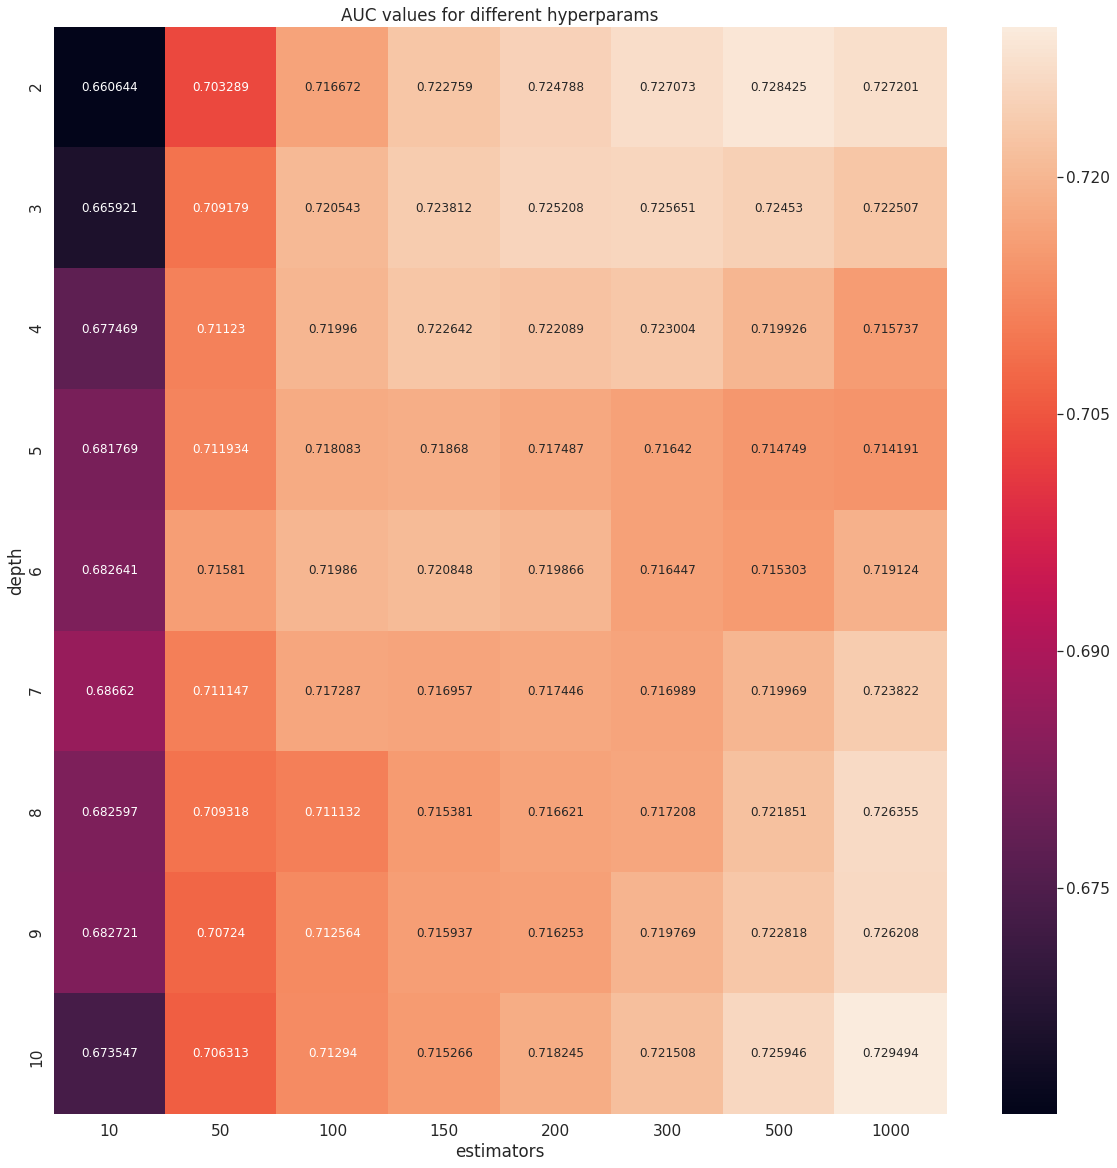

In [ ]:
drawMultiVariableHeatMap(new_depth,new_estimators, train_auc, cv_auc)

In [216]:
print('best hyper params are max_depth: 3 and estimators=200')

best hyper params are max_depth: 3 and estimators=200


#### 7.1.4.2. Optimal Model

In [217]:
model_optimal = XGBClassifier(class_weight='balanced', max_depth = 3, n_estimators = 200, n_jobs=-3)

In [218]:
model_optimal.fit(vectors_train, project_data_labels_train[:30000])
#print the order of classes/ labels in which prob scores will return
print(model_optimal.classes_)

[0 1]


#### 7.1.4.3. ROC Curve

In [219]:
train_pred = predict_prob(model_optimal, vectors_train)
cv_pred = predict_prob(model_optimal, vectors_cv)
test_pred = predict_prob(model_optimal, vectors_test)

In [220]:
#true positive and false positive values
train_fpr, train_tpr, tr_thresholds = getROCValues(train_pred,project_data_labels_train[:30000])
cv_fpr, cv_tpr, cv_thresholds = getROCValues(cv_pred,project_data_labels_cv)
test_fpr, test_tpr, te_thresholds = getROCValues(test_pred,project_data_labels_test)

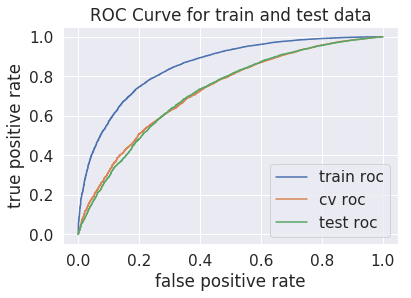

In [221]:
#ROC curves for train and test data sets

plt.plot(train_fpr,train_tpr, label = 'train roc')
plt.plot(cv_fpr,cv_tpr, label = 'cv roc')
plt.plot(test_fpr,test_tpr, label = 'test roc')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve for train and test data")
plt.grid('on')
plt.show()

In [222]:
print("The AUC value for train data is :",auc(train_fpr,train_tpr))
print("The AUC value for cv data is :",auc(cv_fpr,cv_tpr))
print("The AUC value for test data is :",auc(test_fpr,test_tpr))

The AUC value for train data is : 0.8538199417375378
The AUC value for cv data is : 0.7252082631282606
The AUC value for test data is : 0.7214165213599846


#### 7.1.4.4. Confusion Matrices

##### 7.1.4.4.1. On Train Data





  0%|          | 0/30000 [00:00<?, ?it/s]



100%|██████████| 30000/30000 [00:00<00:00, 1365614.87it/s]



the maximum value of tpr*(1-fpr) 0.600461086777959 for threshold 0.832


confusion matrix [[ 3603  1009]
 [ 5987 19401]]


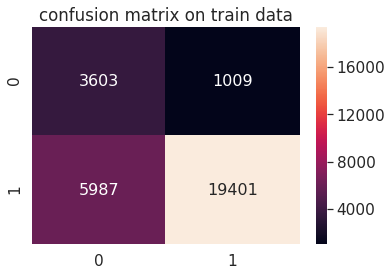

In [223]:
#draw confusion matrix for train data set
predictions_train = predict(train_pred, tr_thresholds, train_tpr, train_fpr)
print('\n')
cnf_matrix_train = findCnfMat(project_data_labels_train[:30000], predictions_train)
print('confusion matrix', cnf_matrix_train)
drawHeatMap(cnf_matrix_train, ['0','1'], ['0','1'], 'confusion matrix on train data')

##### 7.1.4.4.2. On CV Data





  0%|          | 0/17480 [00:00<?, ?it/s]



100%|██████████| 17480/17480 [00:00<00:00, 1180885.13it/s]



the maximum value of tpr*(1-fpr) 0.4437595126255283 for threshold 0.811


confusion matrix [[1798  849]
 [5346 9487]]


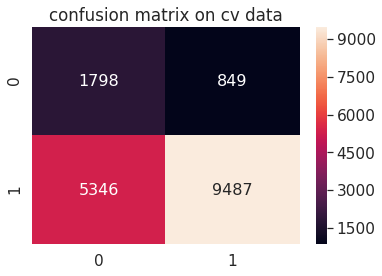

In [224]:
#draw confusion matrix for tecvst data set
predictions_cv = predict(cv_pred, cv_thresholds, cv_tpr, cv_fpr)
cnf_matrix_cv = findCnfMat(project_data_labels_cv, predictions_cv)
print('\n')
print('confusion matrix', cnf_matrix_cv)
drawHeatMap(cnf_matrix_cv, ['0','1'], ['0','1'], 'confusion matrix on cv data')

##### 7.1.4.4.3. On Test Data





  0%|          | 0/21850 [00:00<?, ?it/s]



100%|██████████| 21850/21850 [00:00<00:00, 1281522.83it/s]



the maximum value of tpr*(1-fpr) 0.4476259296682182 for threshold 0.814


confusion matrix [[ 2259  1049]
 [ 6577 11965]]


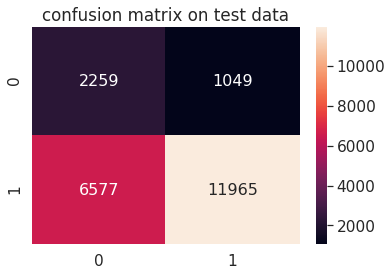

In [225]:
#draw confusion matrix for test data set
predictions_test = predict(test_pred, te_thresholds, test_tpr, test_fpr)
cnf_matrix_test = findCnfMat(project_data_labels_test, predictions_test)
print('\n')
print('confusion matrix', cnf_matrix_test)
drawHeatMap(cnf_matrix_test, ['0','1'], ['0','1'], 'confusion matrix on test data')

### 7.1.5. Apply XGBoost on tfidf avg word to vectors

In [202]:
#stack list must contain atleast one sparse matrix
#https://stackoverflow.com/a/55756295
vectors_train = hstack((cat_num[:30000], csr_matrix(tfidf_w2v_vectors_train_essays[:30000]),
               tfidf_w2v_vectors_train_titles[:30000])).tocsr()
print(vectors_train.shape)
#cv data
vectors_cv = hstack((cat_num_cv[:30000], csr_matrix(tfidf_w2v_vectors_cv_essays[:30000]), 
                    tfidf_w2v_vectors_cv_titles[:30000])).tocsr() 
print(vectors_cv.shape)
#test data
print(len(tfidf_w2v_vectors_test_titles))
vectors_test = hstack((cat_num_test[:30000], csr_matrix(tfidf_w2v_vectors_test_essays[:30000]), 
                    tfidf_w2v_vectors_test_titles[:30000])).tocsr() 
print(vectors_test.shape)

(30000, 613)
(17480, 613)
21850
(21850, 613)


#### 7.1.5.1. Apply Model

In [203]:
train_auc, cv_auc = ApplyXGBoostModel(vectors_train, project_data_labels_train[:30000], vectors_cv, project_data_labels_cv,
                                      max_depth, n_estimators)





  0%|          | 0/9 [00:00<?, ?it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**************************************************


applying CV to find best hyper parameter






 11%|█         | 1/9 [10:30<1:24:05, 630.67s/it]



 22%|██▏       | 2/9 [25:18<1:22:34, 707.86s/it]



 33%|███▎      | 3/9 [44:31<1:24:08, 841.46s/it]



 44%|████▍     | 4/9 [1:08:33<1:25:06, 1021.39s/it]



 56%|█████▌    | 5/9 [1:37:12<1:22:03, 1230.94s/it]



 67%|██████▋   | 6/9 [2:10:33<1:13:05, 1461.90s/it]



 78%|███████▊  | 7/9 [2:47:57<56:33, 1696.55s/it]  



 89%|████████▉ | 8/9 [3:28:39<32:00, 1920.15s/it]



100%|██████████| 9/9 [4:11:51<00:00, 2121.67s/it]

time taken for gridsearch cv is 15111.677617788315


**************************************************




72
72
72


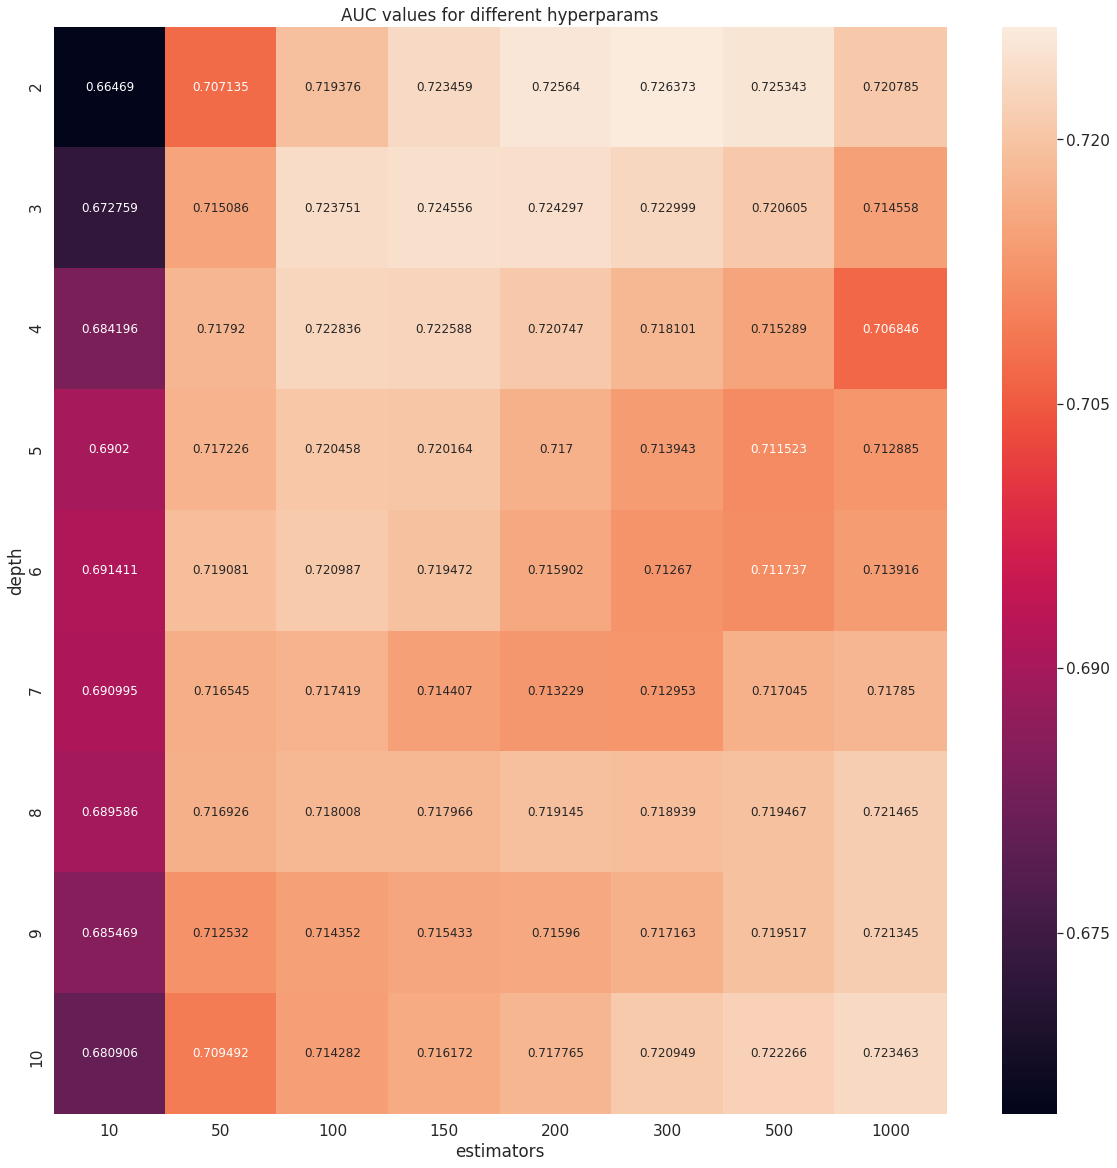

In [204]:
drawMultiVariableHeatMap(new_depth,new_estimators, train_auc, cv_auc)

In [207]:
print('Best hyper params are max_depth=2 and estimators=300')

Best hyper params are max_depth=2 and estimators=300


#### 7.1.5.2. Optimal Model

In [205]:
model_optimal = XGBClassifier(class_weight='balanced', max_depth = 2, n_estimators = 300, n_jobs=-3)

In [206]:
model_optimal.fit(vectors_train, project_data_labels_train[:30000])
#print the order of classes/ labels in which prob scores will return
print(model_optimal.classes_)

[0 1]


In [208]:
train_pred = predict_prob(model_optimal, vectors_train)
cv_pred = predict_prob(model_optimal, vectors_cv)
test_pred = predict_prob(model_optimal, vectors_test)

In [209]:
#true positive and false positive values
train_fpr, train_tpr, tr_thresholds = getROCValues(train_pred,project_data_labels_train[:30000])
cv_fpr, cv_tpr, cv_thresholds = getROCValues(cv_pred,project_data_labels_cv)
test_fpr, test_tpr, te_thresholds = getROCValues(test_pred,project_data_labels_test)

#### 7.1.5.3. ROC Curve

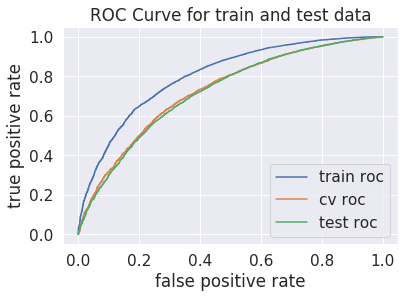

In [210]:
#ROC curves for train and test data sets

plt.plot(train_fpr,train_tpr, label = 'train roc')
plt.plot(cv_fpr,cv_tpr, label = 'cv roc')
plt.plot(test_fpr,test_tpr, label = 'test roc')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve for train and test data")
plt.grid('on')
plt.show()

In [211]:
print("The AUC value for train data is :",auc(train_fpr,train_tpr))
print("The AUC value for cv data is :",auc(cv_fpr,cv_tpr))
print("The AUC value for test data is :",auc(test_fpr,test_tpr))

The AUC value for train data is : 0.8029567538515168
The AUC value for cv data is : 0.7263725286466622
The AUC value for test data is : 0.7202125486020365


#### 7.1.5.4. Confusion Matrices

##### 7.1.5.4.1. On Train Data





  0%|          | 0/30000 [00:00<?, ?it/s]



100%|██████████| 30000/30000 [00:00<00:00, 1081898.47it/s]



the maximum value of tpr*(1-fpr) 0.5300552425489106 for threshold 0.843


confusion matrix [[ 3494  1118]
 [ 7855 17533]]


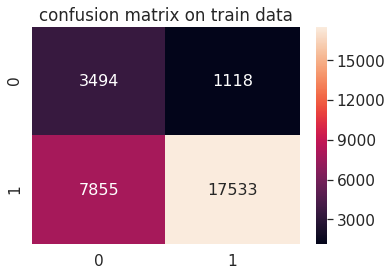

In [212]:
#draw confusion matrix for train data set
predictions_train = predict(train_pred, tr_thresholds, train_tpr, train_fpr)
print('\n')
cnf_matrix_train = findCnfMat(project_data_labels_train[:30000], predictions_train)
print('confusion matrix', cnf_matrix_train)
drawHeatMap(cnf_matrix_train, ['0','1'], ['0','1'], 'confusion matrix on train data')

##### 7.1.5.4.2. On CV Data





  0%|          | 0/17480 [00:00<?, ?it/s]



100%|██████████| 17480/17480 [00:00<00:00, 1009131.54it/s]



the maximum value of tpr*(1-fpr) 0.45196337891158517 for threshold 0.783


confusion matrix [[ 1660   987]
 [ 4341 10492]]


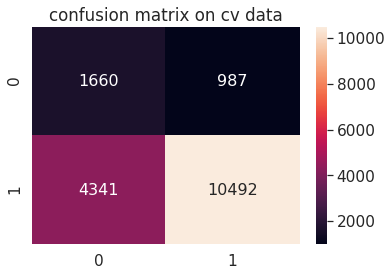

In [213]:
#draw confusion matrix for tecvst data set
predictions_cv = predict(cv_pred, cv_thresholds, cv_tpr, cv_fpr)
cnf_matrix_cv = findCnfMat(project_data_labels_cv, predictions_cv)
print('\n')
print('confusion matrix', cnf_matrix_cv)
drawHeatMap(cnf_matrix_cv, ['0','1'], ['0','1'], 'confusion matrix on cv data')

##### 7.1.5.4.3. ON Test Data 





  0%|          | 0/21850 [00:00<?, ?it/s]



100%|██████████| 21850/21850 [00:00<00:00, 1216232.38it/s]



the maximum value of tpr*(1-fpr) 0.44134033692194863 for threshold 0.799


confusion matrix [[ 2162  1146]
 [ 6111 12431]]


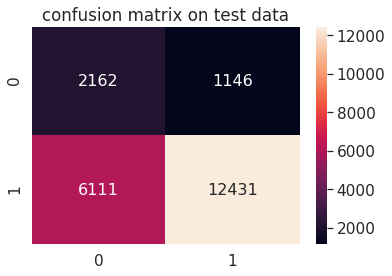

In [214]:
#draw confusion matrix for test data set
predictions_test = predict(test_pred, te_thresholds, test_tpr, test_fpr)
cnf_matrix_test = findCnfMat(project_data_labels_test, predictions_test)
print('\n')
print('confusion matrix', cnf_matrix_test)
drawHeatMap(cnf_matrix_test, ['0','1'], ['0','1'], 'confusion matrix on test data')

# Conclusions

In [ ]:
# Compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

#AUC: area under curve for Test data

x = PrettyTable()
x.field_names = ["Model","max_depth","n_estimators", "Test AUC"]

x.add_row(['random forest(BOW)', 10, 1000, 0.723])
x.add_row(['random forest(TFIDF)', 2, 1000, 0.705])
x.add_row(['random forest(AVG W2V)', 6, 300, 0.694, 5, 500, 0.617])
x.add_row(['random forest(TFIDF W2V)', 7, 200, 0.697])
x.add_row(['XgBoost(BOW)', 2, 1000, 0.741])
x.add_row(['XgBoost(TFIDF)', 3, 300, 0.728])
x.add_row(['XgBoost(AVG W2V)', 3, 200, 0.721])
x.add_row(['XgBoost(TFIDF W2V)', 2, 300, 0.720])

print(x)

**XG boost performance is better than Random forest model**